#1. Import 

In [ ]:
import torchvision.transforms as transforms
import torchvision
import torch
import torch.nn as nn

import random
import matplotlib.pyplot as plt

#2. Configure Data

In [ ]:
def per_image_standardization(image):
    """
    This function creates a custom per image standardization
    transform which is used for data augmentation.
    params:
        - image (torch Tensor): Image Tensor that needs to be standardized.
    
    returns:
        - image (torch Tensor): Image Tensor post standardization.
    """
    # get original data type
    orig_dtype = image.dtype

    # compute image mean
    image_mean = torch.mean(image, dim=(-1, -2, -3))

    # compute image standard deviation
    stddev = torch.std(image, axis=(-1, -2, -3))

    # compute number of pixels
    num_pixels = torch.tensor(torch.numel(image), dtype=torch.float32)

    # compute minimum standard deviation
    min_stddev = torch.rsqrt(num_pixels)

    # compute adjusted standard deviation
    adjusted_stddev = torch.max(stddev, min_stddev)

    # normalize image
    image -= image_mean
    image = torch.div(image, adjusted_stddev)

    # make sure that image output dtype  == input dtype
    assert image.dtype == orig_dtype

    return image

def shuffle_pixels(image, indicies):
    image = image.reshape(3,-1)
    image = image[:,indicies]
    image = image.reshape(3,28,28)
    return image

class myNormalize(object):
    def __call__(self,img):
        return  per_image_standardization(img)

class myShuffle(object):
    def __init__(self, shape):
        self.indicies = torch.randperm(shape)
    def __call__(self,img):
        return  shuffle_pixels(img, self.indicies)

In [ ]:
BATCH_SIZE = 4

transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

#3. Upload Data  

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

validset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


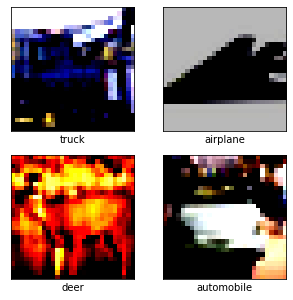

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

#4. Augment Data

##Color Jitter

In [ ]:
transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

trainset_ColorJitter = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_ColorJitter)
trainloader_ColorJitter = torch.utils.data.DataLoader(trainset_ColorJitter, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


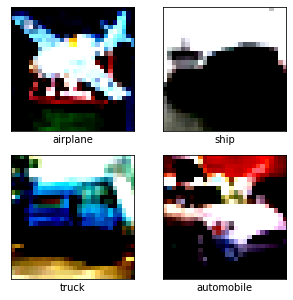

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_ColorJitter, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Crop

In [ ]:
transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

trainset_RandomCrop = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomCrop)
trainloader_RandomCrop = torch.utils.data.DataLoader(trainset_RandomCrop, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


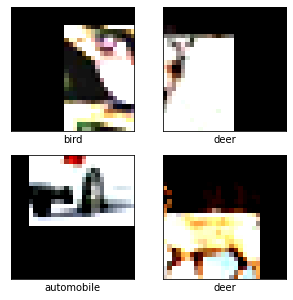

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomCrop, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Horizontal Flip

In [ ]:
transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

trainset_RandomHorizontalFlip = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomHorizontalFlip)
trainloader_RandomHorizontalFlip = torch.utils.data.DataLoader(trainset_RandomHorizontalFlip, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


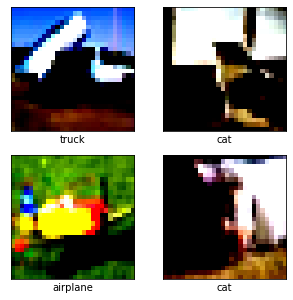

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomHorizontalFlip, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Perspective

In [ ]:
transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])
trainset_RandomPerspective = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomPerspective)
trainloader_RandomPerspective = torch.utils.data.DataLoader(trainset_RandomPerspective, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


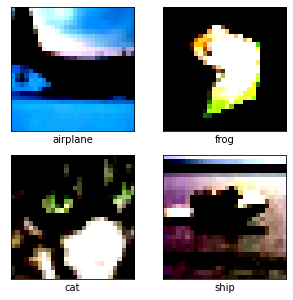

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomPerspective, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Rotation

In [ ]:
transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])
trainset_RandomRotation = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomRotation)
trainloader_RandomRotation = torch.utils.data.DataLoader(trainset_RandomRotation, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


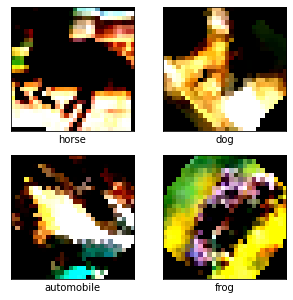

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomRotation, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Erasing

In [ ]:
transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])
trainset_RandomErasing = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomErasing)
trainloader_RandomErasing = torch.utils.data.DataLoader(trainset_RandomErasing, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


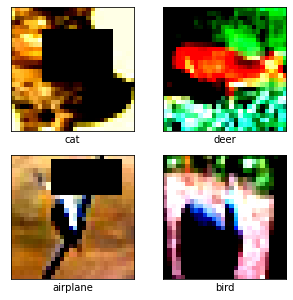

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomErasing, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Pixel Shuffling

In [ ]:
transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

trainset_Shuffle = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_Shuffle)
trainloader_Shuffle = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


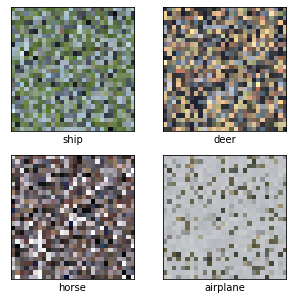

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_Shuffle, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)
    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Labels

In [ ]:
transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

trainset_RandomLabel = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

random.shuffle(trainset_RandomLabel.targets)

trainloader_RandomLabel = torch.utils.data.DataLoader(trainset_RandomLabel, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


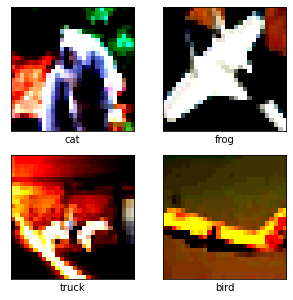

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomLabel, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

# Start Here

##Transformations

In [ ]:
transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])


transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])

transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])

transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])

transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

##CIFAR10

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 0 #0 is transform_train

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


##CIFAR100

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 0 #0 is transform_train

class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
	             'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'containers'	'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
                'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
                'bed', 'chair', 'couch', 'table', 'wardrobe',
	              'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
	              'bear', 'leopard', 'lion', 'tiger', 'wolf',
	              'bridge', 'castle', 'house', 'road', 'skyscraper',
	              'cloud', 'forest', 'mountain', 'plain', 'sea',
	              'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
	              'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
	              'crab', 'lobster', 'snail', 'spider', 'worm',
	              'baby', 'boy', 'girl', 'man', 'woman',
	              'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
	              'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
	              'maple', 'oak', 'palm', 'pine', 'willow',
	              'bicycle', 'bus', 'motorcycle', 'pickup' 'truck', 'train',
	              'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 512

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


# Inception v3

In [ ]:
#### smaller inception for cifar10 input size 28 x 28 
# class Con(nn.Module):
#   def __init__(self, in_channel, c, k, s):
#       super(Con, self).__init__()
#       self.branch1 = nn.Sequential(
#           Conv2d(in_channel, C, kernel_size = k,stride = s, padding=0),
#           nn.BatchNorm2d(C),
#           nn.ReLU()
#       )
    
#   def forward(self, x):
#       branch1 = self.branch1(x)
#       # branch2 = self.branch2(x)
#       # nn.BatchNorm2d(8)
#       # return torch.cat([branch1, branch2], 1) 
#       return branch1

class Inception(nn.Module):
  def __init__(self, in_channel, ch1, ch3):
      super(Inception, self).__init__()
      self.branch1 = nn.Sequential(
          nn.Conv2d(in_channel, ch1, kernel_size = 1,stride=1, padding=0),
          nn.BatchNorm2d(ch1),
          nn.ReLU(inplace=True)
      )
      
      self.branch2 = nn.Sequential(
          nn.Conv2d(in_channel, ch3, kernel_size = 3,stride=1, padding=1),
          nn.BatchNorm2d(ch3),
          nn.ReLU(inplace=True)
      )
      
  def forward(self, x):
      branch1 = self.branch1(x)
      branch2 = self.branch2(x)
      return torch.cat([branch1, branch2], 1) 

class Downsampling(nn.Module):
  def __init__(self, in_channel, ch3):
      super(Downsampling, self).__init__()
      self.branch1 = nn.Sequential(
          nn.Conv2d(in_channel, ch3, kernel_size = 3,stride=2, padding=0), ##is the padding wrong?
          nn.BatchNorm2d(ch3),
          nn.ReLU(inplace=True)
      )
      
      self.branch2 = nn.MaxPool2d(3, stride=2)

      
  def forward(self, x):
      branch1 = self.branch1(x)
      branch2 = self.branch2(x)
      return torch.cat([branch1, branch2], 1) 

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__() ## change input channels 
        self.conv1 = nn.Sequential(nn.Conv2d(3, 96, kernel_size=3, stride = 1),
                                   nn.BatchNorm2d(96),
                                   nn.ReLU(inplace=True))

        self.incept1 = Inception(96, 32, 32) #in_channel, ch1, ch3
        self.incept2 = Inception(64, 32, 48)
        self.ds1 = Downsampling(80,80)

        self.incept3 = Inception(160, 112,48)
        self.incept4 = Inception(160, 96, 64)
        self.incept5 = Inception(160, 80, 80)
        self.incept6 = Inception(160, 48, 96)
        self.ds2 = Downsampling(144,96)

        self.incept7 = Inception(240, 176, 160)
        self.incept8 = Inception(336, 176, 160)
        self.mp = nn.AvgPool2d(7, stride=1,padding=3)

        self.fc = nn.Linear(8400, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # in_size = x.size(0)
        x = self.conv1(x)

        x = self.ds1(self.incept2(self.incept1(x)))

        x = self.incept6(self.incept5(self.incept4(self.incept3(x))))
        x = self.ds2(x)

        x = self.mp(self.incept8(self.incept7(x)))

        # x = x.view(in_size, -1)  # flatten the tensor
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


In [ ]:
model = Net()

for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    print(inputs.shape)
    print(model(inputs))
    break

torch.Size([256, 3, 28, 28])
tensor([[ 0.0259,  0.1643,  0.0291,  ...,  0.0478,  0.1434, -0.1356],
        [-0.1271,  0.0235,  0.2306,  ..., -0.1153,  0.1330,  0.0346],
        [-0.1703,  0.2386,  0.0589,  ...,  0.0609,  0.1259, -0.1477],
        ...,
        [-0.1494,  0.2432,  0.1002,  ...,  0.0328,  0.1877, -0.0761],
        [-0.3195,  0.5654,  0.0301,  ...,  0.1478,  0.3169, -0.4247],
        [-0.0385,  0.1343,  0.0661,  ...,  0.0135,  0.0572, -0.1453]],
       grad_fn=<AddmmBackward>)


# Training Inception

In [ ]:
from __future__ import print_function

import os
import logging
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import torch.optim


def train_model(model, train_loader, val_loader,start_epoch=None, epochs=300):
  cudnn.benchmark = True

  # define loss function (criterion) and pptimizer
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = torch.optim.SGD(model.parameters(), 0.1,
                              momentum=0.9,
                              weight_decay=0.95)

  start_epoch = start_epoch or 0
  epochs = epochs
  start = time.time()
  for epoch in range(start_epoch, epochs):
    adjust_learning_rate(optimizer, epoch, 0.1)

    # train for one epoch
    tr_loss, tr_prec1 = train_epoch(train_loader, model, criterion, optimizer, epoch)

    # evaluate on validation set
    val_loss, val_prec1 = validate_epoch(val_loader, model, criterion, epoch)
    torch.save(model.state_dict(),'/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/InceptionModel')
    #if args.eval_full_trainset:
    #  tr_loss, tr_prec1 = validate_epoch(train_loader, model, criterion, epoch, args)
    logging.info('%03d: Acc-tr: %6.2f, Acc-val: %6.2f, L-tr: %6.4f, L-val: %6.4f',
                 epoch, tr_prec1, val_prec1, tr_loss, val_loss)
    if int(tr_prec1) == 100:
      end = time.time() - start 
      
      break
    print(epoch, tr_prec1, val_prec1, tr_loss, val_loss)


def get_model(model):
  # create model
  if model == 'wide-resnet':
    model = WideResNet(28, 10, 1,drop_rate=0.0)

  elif model == 'mlp':
    n_units = [int(x) for x in '512'.split('x')] # hidden dims
    n_units.append(10)  # output dim
    n_units.insert(0, 32*32*3)        # input dim
    model = MLP(n_units)
  elif model == 'inception':
    model = Net()


  # for training on multiple GPUs.
  # Use CUDA_VISIBLE_DEVICES=0,1 to specify which GPUs to use
  # model = torch.nn.DataParallel(model).cuda()
  model = model.cuda()

  return model

def train_epoch(train_loader, model, criterion, optimizer, epoch):
  """Train for one epoch on the training set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to train mode
  model.train()

  for i, (input, target) in enumerate(train_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input)
    target_var = torch.autograd.Variable(target)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

    # compute gradient and do SGD step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  return losses.avg, top1.avg


def validate_epoch(val_loader, model, criterion, epoch):
  """Perform validation on the validation set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to evaluate mode
  model.eval()

  for i, (input, target) in enumerate(val_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input, volatile=True)
    target_var = torch.autograd.Variable(target, volatile=True)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

  return losses.avg, top1.avg


class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count


def adjust_learning_rate(optimizer, epoch, lr_0):
  """Sets the learning rate to the initial LR decayed by 10 after 150 and 225 epochs"""
  lr = lr_0 * (0.1 ** (epoch // 150)) * (0.1 ** (epoch // 225))
  for param_group in optimizer.param_groups:
      param_group['lr'] = lr


def accuracy(output, target, topk=(1,)):
  """Computes the precision@k for the specified values of k"""
  maxk = max(topk)
  batch_size = target.size(0)

  _, pred = output.topk(maxk, 1, True, True)
  pred = pred.t()
  correct = pred.eq(target.view(1, -1).expand_as(pred))

  res = []
  for k in topk:
      correct_k = correct[:k].view(-1).float().sum(0)
      res.append(correct_k.mul_(100.0 / batch_size))
  return res


def setup_logging(name):
  import datetime
  exp_dir = os.path.join('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs', name)
  if not os.path.isdir(exp_dir):
    os.makedirs(exp_dir)
  log_fn = os.path.join(exp_dir, "LOG.{0}.normal.txt".format(datetime.date.today().strftime("%y%m%d")))
  logging.basicConfig(filename=log_fn, filemode='w', level=logging.DEBUG)
  # also log into console
  console = logging.StreamHandler()
  console.setLevel(logging.INFO)
  logging.getLogger('').addHandler(console)
  print('Logging into %s...' % exp_dir)


def main(name, model, train):
  setup_logging('inception')
  if train == 'train':
    train_loader = trainloader
    #for i, (input, target) in enumerate(train_loader):
    #  print(input.size())
    #  break
    val_loader = valloader
    model = get_model(model)
    print('Number of parameters: ', sum([p.data.nelement() for p in model.parameters()]))
    train_model(model, train_loader, val_loader)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Corruption

In [ ]:
  def corrupt_labels(train_set, corrupt_prob):
    # inputs, targets = zip(*train_loader)
    labels = np.array(train_set.targets)
    np.random.seed(12345)
    mask = np.random.rand(len(labels)) <= corrupt_prob
    rnd_labels = np.random.choice(10, mask.sum())
    labels[mask] = rnd_labels
    # we need to explicitly cast the labels from npy.int64 to
    # builtin int type, otherwise pytorch will fail...
    labels = [int(x) for x in labels]

    train_set.targets = labels
    return train_set 

In [ ]:
import time 
prob = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in prob:
  trainset = corrupt_labels(train_set, i)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                            shuffle=True, num_workers=2)

  valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=None)
  valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                            shuffle=True, num_workers=2)
  main("Random Label",'inception','train')

In [ ]:
main("Normal Test",'inception','train')


Logging into /content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception...
Number of parameters:  1733466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
000: Acc-tr:  10.87, Acc-val:  10.00, L-tr: 2.2909, L-val: 2.3028


0 10.874 10.0 2.2908877366638185 2.3027554164886475


001: Acc-tr:   9.84, Acc-val:  10.00, L-tr: 2.3028, L-val: 2.3028


1 9.838 10.0 2.302752904891968 2.30277717590332


002: Acc-tr:   9.75, Acc-val:  10.00, L-tr: 2.3028, L-val: 2.3027


2 9.746 10.0 2.302789159927368 2.3026701206207276


003: Acc-tr:   9.78, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


3 9.778 10.0 2.3027396139526366 2.302729064178467


004: Acc-tr:   9.90, Acc-val:  10.00, L-tr: 2.3028, L-val: 2.3027


4 9.902 10.0 2.302750103225708 2.302673137283325


005: Acc-tr:   9.89, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


5 9.886 10.0 2.3026840580749512 2.302655256652832


006: Acc-tr:  10.14, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


6 10.14 10.0 2.3026843462371827 2.302706226348877


007: Acc-tr:  10.06, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


7 10.056 10.0 2.3027264292907716 2.3026904289245604


008: Acc-tr:   9.95, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3026


8 9.952 10.0 2.3027010878753664 2.30260774269104


009: Acc-tr:   9.96, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


9 9.964 10.0 2.3026845289611817 2.302672880554199


010: Acc-tr:   9.78, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


10 9.782 10.0 2.3027398078918457 2.302658724975586


011: Acc-tr:   9.83, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3026


11 9.83 10.0 2.302708609237671 2.3026429370880126


012: Acc-tr:   9.97, Acc-val:  10.00, L-tr: 2.3027, L-val: 2.3027


12 9.97 10.0 2.302718133926392 2.302727922821045


KeyboardInterrupt: ignored

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=selectedTransform)
random.shuffle(trainset.targets)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

main("Random Label",'inception','train')

Files already downloaded and verified
Files already downloaded and verified
Logging into /content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception...
Number of parameters:  1733466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
000: Acc-tr:  10.06, Acc-val:  10.00, L-tr: 2.3420, L-val: 2.3038
000: Acc-tr:  10.06, Acc-val:  10.00, L-tr: 2.3420, L-val: 2.3038
000: Acc-tr:  10.06, Acc-val:  10.00, L-tr: 2.3420, L-val: 2.3038
000: Acc-tr:  10.06, Acc-val:  10.00, L-tr: 2.3420, L-val: 2.3038
000: Acc-tr:  10.06, Acc-val:  10.00, L-tr: 2.3420, L-val: 2.3038


0 10.062 10.0 2.3420028659057617 2.3037737937927245


001: Acc-tr:  10.05, Acc-val:  10.03, L-tr: 2.3034, L-val: 2.3048
001: Acc-tr:  10.05, Acc-val:  10.03, L-tr: 2.3034, L-val: 2.3048
001: Acc-tr:  10.05, Acc-val:  10.03, L-tr: 2.3034, L-val: 2.3048
001: Acc-tr:  10.05, Acc-val:  10.03, L-tr: 2.3034, L-val: 2.3048
001: Acc-tr:  10.05, Acc-val:  10.03, L-tr: 2.3034, L-val: 2.3048


1 10.054 10.03 2.303443915863037 2.304822339630127


002: Acc-tr:  10.22, Acc-val:  10.10, L-tr: 2.3035, L-val: 2.3047
002: Acc-tr:  10.22, Acc-val:  10.10, L-tr: 2.3035, L-val: 2.3047
002: Acc-tr:  10.22, Acc-val:  10.10, L-tr: 2.3035, L-val: 2.3047
002: Acc-tr:  10.22, Acc-val:  10.10, L-tr: 2.3035, L-val: 2.3047
002: Acc-tr:  10.22, Acc-val:  10.10, L-tr: 2.3035, L-val: 2.3047


2 10.224 10.1 2.303494524154663 2.3046598140716554


003: Acc-tr:   9.93, Acc-val:   8.93, L-tr: 2.3036, L-val: 2.3038
003: Acc-tr:   9.93, Acc-val:   8.93, L-tr: 2.3036, L-val: 2.3038
003: Acc-tr:   9.93, Acc-val:   8.93, L-tr: 2.3036, L-val: 2.3038
003: Acc-tr:   9.93, Acc-val:   8.93, L-tr: 2.3036, L-val: 2.3038
003: Acc-tr:   9.93, Acc-val:   8.93, L-tr: 2.3036, L-val: 2.3038


3 9.926 8.93 2.303604298553467 2.3038262535095213


004: Acc-tr:  10.12, Acc-val:  10.00, L-tr: 2.3034, L-val: 2.3044
004: Acc-tr:  10.12, Acc-val:  10.00, L-tr: 2.3034, L-val: 2.3044
004: Acc-tr:  10.12, Acc-val:  10.00, L-tr: 2.3034, L-val: 2.3044
004: Acc-tr:  10.12, Acc-val:  10.00, L-tr: 2.3034, L-val: 2.3044
004: Acc-tr:  10.12, Acc-val:  10.00, L-tr: 2.3034, L-val: 2.3044


4 10.12 10.0 2.3033984200286866 2.304444411087036


005: Acc-tr:   9.89, Acc-val:  10.11, L-tr: 2.3036, L-val: 2.3033
005: Acc-tr:   9.89, Acc-val:  10.11, L-tr: 2.3036, L-val: 2.3033
005: Acc-tr:   9.89, Acc-val:  10.11, L-tr: 2.3036, L-val: 2.3033
005: Acc-tr:   9.89, Acc-val:  10.11, L-tr: 2.3036, L-val: 2.3033
005: Acc-tr:   9.89, Acc-val:  10.11, L-tr: 2.3036, L-val: 2.3033


5 9.89 10.11 2.3036443508911133 2.303345903778076


006: Acc-tr:   9.93, Acc-val:   9.63, L-tr: 2.3032, L-val: 2.3037
006: Acc-tr:   9.93, Acc-val:   9.63, L-tr: 2.3032, L-val: 2.3037
006: Acc-tr:   9.93, Acc-val:   9.63, L-tr: 2.3032, L-val: 2.3037
006: Acc-tr:   9.93, Acc-val:   9.63, L-tr: 2.3032, L-val: 2.3037
006: Acc-tr:   9.93, Acc-val:   9.63, L-tr: 2.3032, L-val: 2.3037


6 9.932 9.63 2.303224152145386 2.3036822414398195


007: Acc-tr:  10.07, Acc-val:  10.04, L-tr: 2.3039, L-val: 2.3048
007: Acc-tr:  10.07, Acc-val:  10.04, L-tr: 2.3039, L-val: 2.3048
007: Acc-tr:  10.07, Acc-val:  10.04, L-tr: 2.3039, L-val: 2.3048
007: Acc-tr:  10.07, Acc-val:  10.04, L-tr: 2.3039, L-val: 2.3048
007: Acc-tr:  10.07, Acc-val:  10.04, L-tr: 2.3039, L-val: 2.3048


7 10.072 10.04 2.303852338027954 2.3047558486938478


008: Acc-tr:  10.22, Acc-val:  10.08, L-tr: 2.3035, L-val: 2.3045
008: Acc-tr:  10.22, Acc-val:  10.08, L-tr: 2.3035, L-val: 2.3045
008: Acc-tr:  10.22, Acc-val:  10.08, L-tr: 2.3035, L-val: 2.3045
008: Acc-tr:  10.22, Acc-val:  10.08, L-tr: 2.3035, L-val: 2.3045
008: Acc-tr:  10.22, Acc-val:  10.08, L-tr: 2.3035, L-val: 2.3045


8 10.224 10.08 2.303498080291748 2.3045410369873047


009: Acc-tr:  10.04, Acc-val:   8.37, L-tr: 2.3034, L-val: 2.3047
009: Acc-tr:  10.04, Acc-val:   8.37, L-tr: 2.3034, L-val: 2.3047
009: Acc-tr:  10.04, Acc-val:   8.37, L-tr: 2.3034, L-val: 2.3047
009: Acc-tr:  10.04, Acc-val:   8.37, L-tr: 2.3034, L-val: 2.3047
009: Acc-tr:  10.04, Acc-val:   8.37, L-tr: 2.3034, L-val: 2.3047


9 10.042 8.37 2.3034158532714843 2.304692855834961


010: Acc-tr:  10.12, Acc-val:   9.11, L-tr: 2.3034, L-val: 2.3058
010: Acc-tr:  10.12, Acc-val:   9.11, L-tr: 2.3034, L-val: 2.3058
010: Acc-tr:  10.12, Acc-val:   9.11, L-tr: 2.3034, L-val: 2.3058
010: Acc-tr:  10.12, Acc-val:   9.11, L-tr: 2.3034, L-val: 2.3058
010: Acc-tr:  10.12, Acc-val:   9.11, L-tr: 2.3034, L-val: 2.3058


10 10.122 9.11 2.3033821520996094 2.305848111343384


011: Acc-tr:  10.21, Acc-val:   9.17, L-tr: 2.3037, L-val: 2.3074
011: Acc-tr:  10.21, Acc-val:   9.17, L-tr: 2.3037, L-val: 2.3074
011: Acc-tr:  10.21, Acc-val:   9.17, L-tr: 2.3037, L-val: 2.3074
011: Acc-tr:  10.21, Acc-val:   9.17, L-tr: 2.3037, L-val: 2.3074
011: Acc-tr:  10.21, Acc-val:   9.17, L-tr: 2.3037, L-val: 2.3074


11 10.206 9.17 2.303706357345581 2.3073531074523927


012: Acc-tr:  10.14, Acc-val:   8.50, L-tr: 2.3033, L-val: 2.3067
012: Acc-tr:  10.14, Acc-val:   8.50, L-tr: 2.3033, L-val: 2.3067
012: Acc-tr:  10.14, Acc-val:   8.50, L-tr: 2.3033, L-val: 2.3067
012: Acc-tr:  10.14, Acc-val:   8.50, L-tr: 2.3033, L-val: 2.3067
012: Acc-tr:  10.14, Acc-val:   8.50, L-tr: 2.3033, L-val: 2.3067


12 10.138 8.5 2.3033405500793456 2.3067031925201418


013: Acc-tr:  10.20, Acc-val:   8.40, L-tr: 2.3026, L-val: 2.3060
013: Acc-tr:  10.20, Acc-val:   8.40, L-tr: 2.3026, L-val: 2.3060
013: Acc-tr:  10.20, Acc-val:   8.40, L-tr: 2.3026, L-val: 2.3060
013: Acc-tr:  10.20, Acc-val:   8.40, L-tr: 2.3026, L-val: 2.3060
013: Acc-tr:  10.20, Acc-val:   8.40, L-tr: 2.3026, L-val: 2.3060


13 10.196 8.4 2.3026464939117433 2.306029358291626


014: Acc-tr:  10.60, Acc-val:  12.00, L-tr: 2.3025, L-val: 2.3062
014: Acc-tr:  10.60, Acc-val:  12.00, L-tr: 2.3025, L-val: 2.3062
014: Acc-tr:  10.60, Acc-val:  12.00, L-tr: 2.3025, L-val: 2.3062
014: Acc-tr:  10.60, Acc-val:  12.00, L-tr: 2.3025, L-val: 2.3062
014: Acc-tr:  10.60, Acc-val:  12.00, L-tr: 2.3025, L-val: 2.3062


14 10.596 12.0 2.302541607589722 2.30620728225708


015: Acc-tr:  10.47, Acc-val:   8.78, L-tr: 2.3032, L-val: 2.3064
015: Acc-tr:  10.47, Acc-val:   8.78, L-tr: 2.3032, L-val: 2.3064
015: Acc-tr:  10.47, Acc-val:   8.78, L-tr: 2.3032, L-val: 2.3064
015: Acc-tr:  10.47, Acc-val:   8.78, L-tr: 2.3032, L-val: 2.3064
015: Acc-tr:  10.47, Acc-val:   8.78, L-tr: 2.3032, L-val: 2.3064


15 10.474 8.78 2.303204964065552 2.30639462890625


016: Acc-tr:  10.55, Acc-val:   9.69, L-tr: 2.3026, L-val: 2.3064
016: Acc-tr:  10.55, Acc-val:   9.69, L-tr: 2.3026, L-val: 2.3064
016: Acc-tr:  10.55, Acc-val:   9.69, L-tr: 2.3026, L-val: 2.3064
016: Acc-tr:  10.55, Acc-val:   9.69, L-tr: 2.3026, L-val: 2.3064
016: Acc-tr:  10.55, Acc-val:   9.69, L-tr: 2.3026, L-val: 2.3064


16 10.546 9.69 2.3026236562347413 2.3064070903778076


017: Acc-tr:  10.51, Acc-val:   6.67, L-tr: 2.3021, L-val: 2.3083
017: Acc-tr:  10.51, Acc-val:   6.67, L-tr: 2.3021, L-val: 2.3083
017: Acc-tr:  10.51, Acc-val:   6.67, L-tr: 2.3021, L-val: 2.3083
017: Acc-tr:  10.51, Acc-val:   6.67, L-tr: 2.3021, L-val: 2.3083
017: Acc-tr:  10.51, Acc-val:   6.67, L-tr: 2.3021, L-val: 2.3083


17 10.51 6.67 2.302119530792236 2.308282534790039


018: Acc-tr:  10.75, Acc-val:   9.09, L-tr: 2.3020, L-val: 2.3082
018: Acc-tr:  10.75, Acc-val:   9.09, L-tr: 2.3020, L-val: 2.3082
018: Acc-tr:  10.75, Acc-val:   9.09, L-tr: 2.3020, L-val: 2.3082
018: Acc-tr:  10.75, Acc-val:   9.09, L-tr: 2.3020, L-val: 2.3082
018: Acc-tr:  10.75, Acc-val:   9.09, L-tr: 2.3020, L-val: 2.3082


18 10.746 9.09 2.3019682555389402 2.3082309097290037


019: Acc-tr:  10.88, Acc-val:   8.84, L-tr: 2.3020, L-val: 2.3033
019: Acc-tr:  10.88, Acc-val:   8.84, L-tr: 2.3020, L-val: 2.3033
019: Acc-tr:  10.88, Acc-val:   8.84, L-tr: 2.3020, L-val: 2.3033
019: Acc-tr:  10.88, Acc-val:   8.84, L-tr: 2.3020, L-val: 2.3033
019: Acc-tr:  10.88, Acc-val:   8.84, L-tr: 2.3020, L-val: 2.3033


19 10.884 8.84 2.301955305862427 2.303333396911621


020: Acc-tr:  10.71, Acc-val:   8.22, L-tr: 2.3018, L-val: 2.3072
020: Acc-tr:  10.71, Acc-val:   8.22, L-tr: 2.3018, L-val: 2.3072
020: Acc-tr:  10.71, Acc-val:   8.22, L-tr: 2.3018, L-val: 2.3072
020: Acc-tr:  10.71, Acc-val:   8.22, L-tr: 2.3018, L-val: 2.3072
020: Acc-tr:  10.71, Acc-val:   8.22, L-tr: 2.3018, L-val: 2.3072


20 10.706 8.22 2.301828326263428 2.3071533866882326


021: Acc-tr:  10.84, Acc-val:  10.03, L-tr: 2.3017, L-val: 2.3055
021: Acc-tr:  10.84, Acc-val:  10.03, L-tr: 2.3017, L-val: 2.3055
021: Acc-tr:  10.84, Acc-val:  10.03, L-tr: 2.3017, L-val: 2.3055
021: Acc-tr:  10.84, Acc-val:  10.03, L-tr: 2.3017, L-val: 2.3055
021: Acc-tr:  10.84, Acc-val:  10.03, L-tr: 2.3017, L-val: 2.3055


21 10.842 10.03 2.3017305364990235 2.305538671875


022: Acc-tr:  10.80, Acc-val:  11.32, L-tr: 2.3016, L-val: 2.3048
022: Acc-tr:  10.80, Acc-val:  11.32, L-tr: 2.3016, L-val: 2.3048
022: Acc-tr:  10.80, Acc-val:  11.32, L-tr: 2.3016, L-val: 2.3048
022: Acc-tr:  10.80, Acc-val:  11.32, L-tr: 2.3016, L-val: 2.3048
022: Acc-tr:  10.80, Acc-val:  11.32, L-tr: 2.3016, L-val: 2.3048


22 10.802 11.32 2.3016201209259033 2.304792078781128


023: Acc-tr:  10.55, Acc-val:   8.37, L-tr: 2.3013, L-val: 2.3079
023: Acc-tr:  10.55, Acc-val:   8.37, L-tr: 2.3013, L-val: 2.3079
023: Acc-tr:  10.55, Acc-val:   8.37, L-tr: 2.3013, L-val: 2.3079
023: Acc-tr:  10.55, Acc-val:   8.37, L-tr: 2.3013, L-val: 2.3079
023: Acc-tr:  10.55, Acc-val:   8.37, L-tr: 2.3013, L-val: 2.3079


23 10.552 8.37 2.3013158390045168 2.307879627609253


024: Acc-tr:  10.93, Acc-val:   8.88, L-tr: 2.3015, L-val: 2.3067
024: Acc-tr:  10.93, Acc-val:   8.88, L-tr: 2.3015, L-val: 2.3067
024: Acc-tr:  10.93, Acc-val:   8.88, L-tr: 2.3015, L-val: 2.3067
024: Acc-tr:  10.93, Acc-val:   8.88, L-tr: 2.3015, L-val: 2.3067
024: Acc-tr:  10.93, Acc-val:   8.88, L-tr: 2.3015, L-val: 2.3067


24 10.934 8.88 2.3014680165100097 2.306722222518921


025: Acc-tr:  10.86, Acc-val:   9.88, L-tr: 2.3009, L-val: 2.3078
025: Acc-tr:  10.86, Acc-val:   9.88, L-tr: 2.3009, L-val: 2.3078
025: Acc-tr:  10.86, Acc-val:   9.88, L-tr: 2.3009, L-val: 2.3078
025: Acc-tr:  10.86, Acc-val:   9.88, L-tr: 2.3009, L-val: 2.3078
025: Acc-tr:  10.86, Acc-val:   9.88, L-tr: 2.3009, L-val: 2.3078


25 10.86 9.88 2.3008760054779054 2.3078323249816894


026: Acc-tr:  10.90, Acc-val:  10.63, L-tr: 2.3003, L-val: 2.3050
026: Acc-tr:  10.90, Acc-val:  10.63, L-tr: 2.3003, L-val: 2.3050
026: Acc-tr:  10.90, Acc-val:  10.63, L-tr: 2.3003, L-val: 2.3050
026: Acc-tr:  10.90, Acc-val:  10.63, L-tr: 2.3003, L-val: 2.3050
026: Acc-tr:  10.90, Acc-val:  10.63, L-tr: 2.3003, L-val: 2.3050


26 10.896 10.63 2.300264811859131 2.3050212718963623


027: Acc-tr:  11.39, Acc-val:   7.46, L-tr: 2.3000, L-val: 2.3117
027: Acc-tr:  11.39, Acc-val:   7.46, L-tr: 2.3000, L-val: 2.3117
027: Acc-tr:  11.39, Acc-val:   7.46, L-tr: 2.3000, L-val: 2.3117
027: Acc-tr:  11.39, Acc-val:   7.46, L-tr: 2.3000, L-val: 2.3117
027: Acc-tr:  11.39, Acc-val:   7.46, L-tr: 2.3000, L-val: 2.3117


27 11.392 7.46 2.2999589893341064 2.3116619724273684


028: Acc-tr:  11.24, Acc-val:   9.09, L-tr: 2.2995, L-val: 2.3119
028: Acc-tr:  11.24, Acc-val:   9.09, L-tr: 2.2995, L-val: 2.3119
028: Acc-tr:  11.24, Acc-val:   9.09, L-tr: 2.2995, L-val: 2.3119
028: Acc-tr:  11.24, Acc-val:   9.09, L-tr: 2.2995, L-val: 2.3119
028: Acc-tr:  11.24, Acc-val:   9.09, L-tr: 2.2995, L-val: 2.3119


28 11.236 9.09 2.2994837226867677 2.3119337928771975


029: Acc-tr:  11.27, Acc-val:  11.64, L-tr: 2.2985, L-val: 2.3058
029: Acc-tr:  11.27, Acc-val:  11.64, L-tr: 2.2985, L-val: 2.3058
029: Acc-tr:  11.27, Acc-val:  11.64, L-tr: 2.2985, L-val: 2.3058
029: Acc-tr:  11.27, Acc-val:  11.64, L-tr: 2.2985, L-val: 2.3058
029: Acc-tr:  11.27, Acc-val:  11.64, L-tr: 2.2985, L-val: 2.3058


29 11.272 11.64 2.298533678970337 2.305752071380615


030: Acc-tr:  11.71, Acc-val:   8.48, L-tr: 2.2977, L-val: 2.3169
030: Acc-tr:  11.71, Acc-val:   8.48, L-tr: 2.2977, L-val: 2.3169
030: Acc-tr:  11.71, Acc-val:   8.48, L-tr: 2.2977, L-val: 2.3169
030: Acc-tr:  11.71, Acc-val:   8.48, L-tr: 2.2977, L-val: 2.3169
030: Acc-tr:  11.71, Acc-val:   8.48, L-tr: 2.2977, L-val: 2.3169


30 11.71 8.48 2.2976724925994874 2.3168699253082274


031: Acc-tr:  11.94, Acc-val:   8.87, L-tr: 2.2969, L-val: 2.3141
031: Acc-tr:  11.94, Acc-val:   8.87, L-tr: 2.2969, L-val: 2.3141
031: Acc-tr:  11.94, Acc-val:   8.87, L-tr: 2.2969, L-val: 2.3141
031: Acc-tr:  11.94, Acc-val:   8.87, L-tr: 2.2969, L-val: 2.3141
031: Acc-tr:  11.94, Acc-val:   8.87, L-tr: 2.2969, L-val: 2.3141


31 11.94 8.87 2.29687709274292 2.314050370788574


032: Acc-tr:  11.92, Acc-val:   8.05, L-tr: 2.2953, L-val: 2.3143
032: Acc-tr:  11.92, Acc-val:   8.05, L-tr: 2.2953, L-val: 2.3143
032: Acc-tr:  11.92, Acc-val:   8.05, L-tr: 2.2953, L-val: 2.3143
032: Acc-tr:  11.92, Acc-val:   8.05, L-tr: 2.2953, L-val: 2.3143
032: Acc-tr:  11.92, Acc-val:   8.05, L-tr: 2.2953, L-val: 2.3143


32 11.92 8.05 2.295298694152832 2.3143324726104737


033: Acc-tr:  12.04, Acc-val:   9.65, L-tr: 2.2935, L-val: 2.3209
033: Acc-tr:  12.04, Acc-val:   9.65, L-tr: 2.2935, L-val: 2.3209
033: Acc-tr:  12.04, Acc-val:   9.65, L-tr: 2.2935, L-val: 2.3209
033: Acc-tr:  12.04, Acc-val:   9.65, L-tr: 2.2935, L-val: 2.3209
033: Acc-tr:  12.04, Acc-val:   9.65, L-tr: 2.2935, L-val: 2.3209


33 12.036 9.65 2.2935094498443602 2.3209355560302734


034: Acc-tr:  12.39, Acc-val:  10.74, L-tr: 2.2920, L-val: 2.3178
034: Acc-tr:  12.39, Acc-val:  10.74, L-tr: 2.2920, L-val: 2.3178
034: Acc-tr:  12.39, Acc-val:  10.74, L-tr: 2.2920, L-val: 2.3178
034: Acc-tr:  12.39, Acc-val:  10.74, L-tr: 2.2920, L-val: 2.3178
034: Acc-tr:  12.39, Acc-val:  10.74, L-tr: 2.2920, L-val: 2.3178


34 12.394 10.74 2.2920040659332277 2.317782950592041


035: Acc-tr:  12.59, Acc-val:   8.09, L-tr: 2.2910, L-val: 2.3164
035: Acc-tr:  12.59, Acc-val:   8.09, L-tr: 2.2910, L-val: 2.3164
035: Acc-tr:  12.59, Acc-val:   8.09, L-tr: 2.2910, L-val: 2.3164
035: Acc-tr:  12.59, Acc-val:   8.09, L-tr: 2.2910, L-val: 2.3164
035: Acc-tr:  12.59, Acc-val:   8.09, L-tr: 2.2910, L-val: 2.3164


35 12.588 8.09 2.290983420562744 2.316356981277466


036: Acc-tr:  13.02, Acc-val:   9.31, L-tr: 2.2874, L-val: 2.3156
036: Acc-tr:  13.02, Acc-val:   9.31, L-tr: 2.2874, L-val: 2.3156
036: Acc-tr:  13.02, Acc-val:   9.31, L-tr: 2.2874, L-val: 2.3156
036: Acc-tr:  13.02, Acc-val:   9.31, L-tr: 2.2874, L-val: 2.3156
036: Acc-tr:  13.02, Acc-val:   9.31, L-tr: 2.2874, L-val: 2.3156


36 13.022 9.31 2.2873750646209716 2.3156184078216553


037: Acc-tr:  13.27, Acc-val:  10.35, L-tr: 2.2839, L-val: 2.3136
037: Acc-tr:  13.27, Acc-val:  10.35, L-tr: 2.2839, L-val: 2.3136
037: Acc-tr:  13.27, Acc-val:  10.35, L-tr: 2.2839, L-val: 2.3136
037: Acc-tr:  13.27, Acc-val:  10.35, L-tr: 2.2839, L-val: 2.3136
037: Acc-tr:  13.27, Acc-val:  10.35, L-tr: 2.2839, L-val: 2.3136


37 13.27 10.35 2.2839315605926513 2.3136326343536378


038: Acc-tr:  13.41, Acc-val:  11.41, L-tr: 2.2811, L-val: 2.3162
038: Acc-tr:  13.41, Acc-val:  11.41, L-tr: 2.2811, L-val: 2.3162
038: Acc-tr:  13.41, Acc-val:  11.41, L-tr: 2.2811, L-val: 2.3162
038: Acc-tr:  13.41, Acc-val:  11.41, L-tr: 2.2811, L-val: 2.3162
038: Acc-tr:  13.41, Acc-val:  11.41, L-tr: 2.2811, L-val: 2.3162


38 13.414 11.41 2.2810869637298583 2.316209434890747


039: Acc-tr:  14.04, Acc-val:   8.80, L-tr: 2.2759, L-val: 2.3434
039: Acc-tr:  14.04, Acc-val:   8.80, L-tr: 2.2759, L-val: 2.3434
039: Acc-tr:  14.04, Acc-val:   8.80, L-tr: 2.2759, L-val: 2.3434
039: Acc-tr:  14.04, Acc-val:   8.80, L-tr: 2.2759, L-val: 2.3434
039: Acc-tr:  14.04, Acc-val:   8.80, L-tr: 2.2759, L-val: 2.3434


39 14.038 8.8 2.275912877960205 2.3434050704956055


040: Acc-tr:  14.21, Acc-val:  10.49, L-tr: 2.2696, L-val: 2.3549
040: Acc-tr:  14.21, Acc-val:  10.49, L-tr: 2.2696, L-val: 2.3549
040: Acc-tr:  14.21, Acc-val:  10.49, L-tr: 2.2696, L-val: 2.3549
040: Acc-tr:  14.21, Acc-val:  10.49, L-tr: 2.2696, L-val: 2.3549
040: Acc-tr:  14.21, Acc-val:  10.49, L-tr: 2.2696, L-val: 2.3549


40 14.206 10.49 2.269595371551514 2.3549105396270753


041: Acc-tr:  14.74, Acc-val:  10.97, L-tr: 2.2627, L-val: 2.3364
041: Acc-tr:  14.74, Acc-val:  10.97, L-tr: 2.2627, L-val: 2.3364
041: Acc-tr:  14.74, Acc-val:  10.97, L-tr: 2.2627, L-val: 2.3364
041: Acc-tr:  14.74, Acc-val:  10.97, L-tr: 2.2627, L-val: 2.3364
041: Acc-tr:  14.74, Acc-val:  10.97, L-tr: 2.2627, L-val: 2.3364


41 14.742 10.97 2.262670145187378 2.336422765350342


042: Acc-tr:  15.20, Acc-val:   9.74, L-tr: 2.2529, L-val: 2.3396
042: Acc-tr:  15.20, Acc-val:   9.74, L-tr: 2.2529, L-val: 2.3396
042: Acc-tr:  15.20, Acc-val:   9.74, L-tr: 2.2529, L-val: 2.3396
042: Acc-tr:  15.20, Acc-val:   9.74, L-tr: 2.2529, L-val: 2.3396
042: Acc-tr:  15.20, Acc-val:   9.74, L-tr: 2.2529, L-val: 2.3396


42 15.196 9.74 2.2528578941345216 2.33955030670166


043: Acc-tr:  15.92, Acc-val:  10.13, L-tr: 2.2412, L-val: 2.3643
043: Acc-tr:  15.92, Acc-val:  10.13, L-tr: 2.2412, L-val: 2.3643
043: Acc-tr:  15.92, Acc-val:  10.13, L-tr: 2.2412, L-val: 2.3643
043: Acc-tr:  15.92, Acc-val:  10.13, L-tr: 2.2412, L-val: 2.3643
043: Acc-tr:  15.92, Acc-val:  10.13, L-tr: 2.2412, L-val: 2.3643


43 15.92 10.13 2.241199477996826 2.3643404014587404


044: Acc-tr:  16.63, Acc-val:  10.68, L-tr: 2.2294, L-val: 2.3710
044: Acc-tr:  16.63, Acc-val:  10.68, L-tr: 2.2294, L-val: 2.3710
044: Acc-tr:  16.63, Acc-val:  10.68, L-tr: 2.2294, L-val: 2.3710
044: Acc-tr:  16.63, Acc-val:  10.68, L-tr: 2.2294, L-val: 2.3710
044: Acc-tr:  16.63, Acc-val:  10.68, L-tr: 2.2294, L-val: 2.3710


44 16.632 10.68 2.2293719092559816 2.3709843044281005


045: Acc-tr:  17.72, Acc-val:   8.90, L-tr: 2.2103, L-val: 2.4222
045: Acc-tr:  17.72, Acc-val:   8.90, L-tr: 2.2103, L-val: 2.4222
045: Acc-tr:  17.72, Acc-val:   8.90, L-tr: 2.2103, L-val: 2.4222
045: Acc-tr:  17.72, Acc-val:   8.90, L-tr: 2.2103, L-val: 2.4222
045: Acc-tr:  17.72, Acc-val:   8.90, L-tr: 2.2103, L-val: 2.4222


45 17.718 8.9 2.2102990393066406 2.422232403564453


046: Acc-tr:  18.76, Acc-val:   9.72, L-tr: 2.1894, L-val: 2.4294
046: Acc-tr:  18.76, Acc-val:   9.72, L-tr: 2.1894, L-val: 2.4294
046: Acc-tr:  18.76, Acc-val:   9.72, L-tr: 2.1894, L-val: 2.4294
046: Acc-tr:  18.76, Acc-val:   9.72, L-tr: 2.1894, L-val: 2.4294
046: Acc-tr:  18.76, Acc-val:   9.72, L-tr: 2.1894, L-val: 2.4294


46 18.756 9.72 2.189427370681763 2.4293963806152346


047: Acc-tr:  20.10, Acc-val:  10.48, L-tr: 2.1636, L-val: 2.4799
047: Acc-tr:  20.10, Acc-val:  10.48, L-tr: 2.1636, L-val: 2.4799
047: Acc-tr:  20.10, Acc-val:  10.48, L-tr: 2.1636, L-val: 2.4799
047: Acc-tr:  20.10, Acc-val:  10.48, L-tr: 2.1636, L-val: 2.4799
047: Acc-tr:  20.10, Acc-val:  10.48, L-tr: 2.1636, L-val: 2.4799


47 20.098 10.48 2.163580284729004 2.479948711013794


048: Acc-tr:  21.88, Acc-val:  10.19, L-tr: 2.1299, L-val: 2.4786
048: Acc-tr:  21.88, Acc-val:  10.19, L-tr: 2.1299, L-val: 2.4786
048: Acc-tr:  21.88, Acc-val:  10.19, L-tr: 2.1299, L-val: 2.4786
048: Acc-tr:  21.88, Acc-val:  10.19, L-tr: 2.1299, L-val: 2.4786
048: Acc-tr:  21.88, Acc-val:  10.19, L-tr: 2.1299, L-val: 2.4786


48 21.884 10.19 2.1299055697631837 2.478626781845093


049: Acc-tr:  23.47, Acc-val:  10.41, L-tr: 2.0942, L-val: 2.5348
049: Acc-tr:  23.47, Acc-val:  10.41, L-tr: 2.0942, L-val: 2.5348
049: Acc-tr:  23.47, Acc-val:  10.41, L-tr: 2.0942, L-val: 2.5348
049: Acc-tr:  23.47, Acc-val:  10.41, L-tr: 2.0942, L-val: 2.5348
049: Acc-tr:  23.47, Acc-val:  10.41, L-tr: 2.0942, L-val: 2.5348


49 23.468 10.41 2.0941803017425538 2.5348299686431885


050: Acc-tr:  25.22, Acc-val:   9.64, L-tr: 2.0536, L-val: 2.6424
050: Acc-tr:  25.22, Acc-val:   9.64, L-tr: 2.0536, L-val: 2.6424
050: Acc-tr:  25.22, Acc-val:   9.64, L-tr: 2.0536, L-val: 2.6424
050: Acc-tr:  25.22, Acc-val:   9.64, L-tr: 2.0536, L-val: 2.6424
050: Acc-tr:  25.22, Acc-val:   9.64, L-tr: 2.0536, L-val: 2.6424


50 25.218 9.64 2.053557625427246 2.6424422096252442


051: Acc-tr:  27.16, Acc-val:  10.21, L-tr: 2.0033, L-val: 2.5824
051: Acc-tr:  27.16, Acc-val:  10.21, L-tr: 2.0033, L-val: 2.5824
051: Acc-tr:  27.16, Acc-val:  10.21, L-tr: 2.0033, L-val: 2.5824
051: Acc-tr:  27.16, Acc-val:  10.21, L-tr: 2.0033, L-val: 2.5824
051: Acc-tr:  27.16, Acc-val:  10.21, L-tr: 2.0033, L-val: 2.5824


51 27.162 10.21 2.0032772409057618 2.582437672042847


052: Acc-tr:  29.48, Acc-val:  10.72, L-tr: 1.9476, L-val: 2.7298
052: Acc-tr:  29.48, Acc-val:  10.72, L-tr: 1.9476, L-val: 2.7298
052: Acc-tr:  29.48, Acc-val:  10.72, L-tr: 1.9476, L-val: 2.7298
052: Acc-tr:  29.48, Acc-val:  10.72, L-tr: 1.9476, L-val: 2.7298
052: Acc-tr:  29.48, Acc-val:  10.72, L-tr: 1.9476, L-val: 2.7298


52 29.48 10.72 1.947646577758789 2.729792911529541


053: Acc-tr:  31.99, Acc-val:   8.55, L-tr: 1.8822, L-val: 2.9632
053: Acc-tr:  31.99, Acc-val:   8.55, L-tr: 1.8822, L-val: 2.9632
053: Acc-tr:  31.99, Acc-val:   8.55, L-tr: 1.8822, L-val: 2.9632
053: Acc-tr:  31.99, Acc-val:   8.55, L-tr: 1.8822, L-val: 2.9632
053: Acc-tr:  31.99, Acc-val:   8.55, L-tr: 1.8822, L-val: 2.9632


53 31.992 8.55 1.8821985789489746 2.9632068347930907


054: Acc-tr:  35.05, Acc-val:  10.19, L-tr: 1.8094, L-val: 3.1996
054: Acc-tr:  35.05, Acc-val:  10.19, L-tr: 1.8094, L-val: 3.1996
054: Acc-tr:  35.05, Acc-val:  10.19, L-tr: 1.8094, L-val: 3.1996
054: Acc-tr:  35.05, Acc-val:  10.19, L-tr: 1.8094, L-val: 3.1996
054: Acc-tr:  35.05, Acc-val:  10.19, L-tr: 1.8094, L-val: 3.1996


54 35.048 10.19 1.8093910232162476 3.1996276935577392


055: Acc-tr:  38.18, Acc-val:   9.32, L-tr: 1.7248, L-val: 3.1605
055: Acc-tr:  38.18, Acc-val:   9.32, L-tr: 1.7248, L-val: 3.1605
055: Acc-tr:  38.18, Acc-val:   9.32, L-tr: 1.7248, L-val: 3.1605
055: Acc-tr:  38.18, Acc-val:   9.32, L-tr: 1.7248, L-val: 3.1605
055: Acc-tr:  38.18, Acc-val:   9.32, L-tr: 1.7248, L-val: 3.1605


55 38.184 9.32 1.7248351236724853 3.160506455230713


056: Acc-tr:  41.77, Acc-val:  10.00, L-tr: 1.6391, L-val: 3.3719
056: Acc-tr:  41.77, Acc-val:  10.00, L-tr: 1.6391, L-val: 3.3719
056: Acc-tr:  41.77, Acc-val:  10.00, L-tr: 1.6391, L-val: 3.3719
056: Acc-tr:  41.77, Acc-val:  10.00, L-tr: 1.6391, L-val: 3.3719
056: Acc-tr:  41.77, Acc-val:  10.00, L-tr: 1.6391, L-val: 3.3719


56 41.77 10.0 1.6390977816009522 3.371910988616943


057: Acc-tr:  45.59, Acc-val:   9.53, L-tr: 1.5385, L-val: 3.2766
057: Acc-tr:  45.59, Acc-val:   9.53, L-tr: 1.5385, L-val: 3.2766
057: Acc-tr:  45.59, Acc-val:   9.53, L-tr: 1.5385, L-val: 3.2766
057: Acc-tr:  45.59, Acc-val:   9.53, L-tr: 1.5385, L-val: 3.2766
057: Acc-tr:  45.59, Acc-val:   9.53, L-tr: 1.5385, L-val: 3.2766


57 45.588 9.53 1.538478090171814 3.276567411804199


058: Acc-tr:  49.65, Acc-val:  10.02, L-tr: 1.4237, L-val: 3.5946
058: Acc-tr:  49.65, Acc-val:  10.02, L-tr: 1.4237, L-val: 3.5946
058: Acc-tr:  49.65, Acc-val:  10.02, L-tr: 1.4237, L-val: 3.5946
058: Acc-tr:  49.65, Acc-val:  10.02, L-tr: 1.4237, L-val: 3.5946
058: Acc-tr:  49.65, Acc-val:  10.02, L-tr: 1.4237, L-val: 3.5946


58 49.646 10.02 1.4237016563415528 3.5945692924499513


059: Acc-tr:  52.96, Acc-val:   8.92, L-tr: 1.3293, L-val: 4.0895
059: Acc-tr:  52.96, Acc-val:   8.92, L-tr: 1.3293, L-val: 4.0895
059: Acc-tr:  52.96, Acc-val:   8.92, L-tr: 1.3293, L-val: 4.0895
059: Acc-tr:  52.96, Acc-val:   8.92, L-tr: 1.3293, L-val: 4.0895
059: Acc-tr:  52.96, Acc-val:   8.92, L-tr: 1.3293, L-val: 4.0895


59 52.964 8.92 1.3292892510223389 4.089521139907837


060: Acc-tr:  57.63, Acc-val:   9.50, L-tr: 1.2147, L-val: 3.7772
060: Acc-tr:  57.63, Acc-val:   9.50, L-tr: 1.2147, L-val: 3.7772
060: Acc-tr:  57.63, Acc-val:   9.50, L-tr: 1.2147, L-val: 3.7772
060: Acc-tr:  57.63, Acc-val:   9.50, L-tr: 1.2147, L-val: 3.7772
060: Acc-tr:  57.63, Acc-val:   9.50, L-tr: 1.2147, L-val: 3.7772


60 57.628 9.5 1.2147340296173095 3.7771602684020995


061: Acc-tr:  61.59, Acc-val:   9.61, L-tr: 1.1026, L-val: 4.2112
061: Acc-tr:  61.59, Acc-val:   9.61, L-tr: 1.1026, L-val: 4.2112
061: Acc-tr:  61.59, Acc-val:   9.61, L-tr: 1.1026, L-val: 4.2112
061: Acc-tr:  61.59, Acc-val:   9.61, L-tr: 1.1026, L-val: 4.2112
061: Acc-tr:  61.59, Acc-val:   9.61, L-tr: 1.1026, L-val: 4.2112


61 61.592 9.61 1.1025679997253417 4.211231286621094


062: Acc-tr:  65.19, Acc-val:   9.93, L-tr: 1.0013, L-val: 4.0968
062: Acc-tr:  65.19, Acc-val:   9.93, L-tr: 1.0013, L-val: 4.0968
062: Acc-tr:  65.19, Acc-val:   9.93, L-tr: 1.0013, L-val: 4.0968
062: Acc-tr:  65.19, Acc-val:   9.93, L-tr: 1.0013, L-val: 4.0968
062: Acc-tr:  65.19, Acc-val:   9.93, L-tr: 1.0013, L-val: 4.0968


62 65.192 9.93 1.0013452958679199 4.0967996864318845


063: Acc-tr:  68.52, Acc-val:  10.36, L-tr: 0.9040, L-val: 4.6306
063: Acc-tr:  68.52, Acc-val:  10.36, L-tr: 0.9040, L-val: 4.6306
063: Acc-tr:  68.52, Acc-val:  10.36, L-tr: 0.9040, L-val: 4.6306
063: Acc-tr:  68.52, Acc-val:  10.36, L-tr: 0.9040, L-val: 4.6306
063: Acc-tr:  68.52, Acc-val:  10.36, L-tr: 0.9040, L-val: 4.6306


63 68.52 10.36 0.9039554824066162 4.630640781784058


064: Acc-tr:  71.92, Acc-val:   8.55, L-tr: 0.8168, L-val: 5.6100
064: Acc-tr:  71.92, Acc-val:   8.55, L-tr: 0.8168, L-val: 5.6100
064: Acc-tr:  71.92, Acc-val:   8.55, L-tr: 0.8168, L-val: 5.6100
064: Acc-tr:  71.92, Acc-val:   8.55, L-tr: 0.8168, L-val: 5.6100
064: Acc-tr:  71.92, Acc-val:   8.55, L-tr: 0.8168, L-val: 5.6100


64 71.922 8.55 0.8168339857101441 5.609984859466553


065: Acc-tr:  75.02, Acc-val:   9.28, L-tr: 0.7246, L-val: 5.4688
065: Acc-tr:  75.02, Acc-val:   9.28, L-tr: 0.7246, L-val: 5.4688
065: Acc-tr:  75.02, Acc-val:   9.28, L-tr: 0.7246, L-val: 5.4688
065: Acc-tr:  75.02, Acc-val:   9.28, L-tr: 0.7246, L-val: 5.4688
065: Acc-tr:  75.02, Acc-val:   9.28, L-tr: 0.7246, L-val: 5.4688


65 75.016 9.28 0.7245637558746338 5.468767828369141


066: Acc-tr:  76.82, Acc-val:  10.06, L-tr: 0.6719, L-val: 5.5375
066: Acc-tr:  76.82, Acc-val:  10.06, L-tr: 0.6719, L-val: 5.5375
066: Acc-tr:  76.82, Acc-val:  10.06, L-tr: 0.6719, L-val: 5.5375
066: Acc-tr:  76.82, Acc-val:  10.06, L-tr: 0.6719, L-val: 5.5375
066: Acc-tr:  76.82, Acc-val:  10.06, L-tr: 0.6719, L-val: 5.5375


66 76.824 10.06 0.6718911735153198 5.537506433105468


067: Acc-tr:  80.05, Acc-val:  10.28, L-tr: 0.5807, L-val: 5.1400
067: Acc-tr:  80.05, Acc-val:  10.28, L-tr: 0.5807, L-val: 5.1400
067: Acc-tr:  80.05, Acc-val:  10.28, L-tr: 0.5807, L-val: 5.1400
067: Acc-tr:  80.05, Acc-val:  10.28, L-tr: 0.5807, L-val: 5.1400
067: Acc-tr:  80.05, Acc-val:  10.28, L-tr: 0.5807, L-val: 5.1400


67 80.054 10.28 0.5806967041587829 5.140030513000489


068: Acc-tr:  81.48, Acc-val:   9.02, L-tr: 0.5431, L-val: 6.0433
068: Acc-tr:  81.48, Acc-val:   9.02, L-tr: 0.5431, L-val: 6.0433
068: Acc-tr:  81.48, Acc-val:   9.02, L-tr: 0.5431, L-val: 6.0433
068: Acc-tr:  81.48, Acc-val:   9.02, L-tr: 0.5431, L-val: 6.0433
068: Acc-tr:  81.48, Acc-val:   9.02, L-tr: 0.5431, L-val: 6.0433


68 81.476 9.02 0.5430859545135498 6.043334363555908


069: Acc-tr:  83.44, Acc-val:   9.95, L-tr: 0.4875, L-val: 5.8222
069: Acc-tr:  83.44, Acc-val:   9.95, L-tr: 0.4875, L-val: 5.8222
069: Acc-tr:  83.44, Acc-val:   9.95, L-tr: 0.4875, L-val: 5.8222
069: Acc-tr:  83.44, Acc-val:   9.95, L-tr: 0.4875, L-val: 5.8222
069: Acc-tr:  83.44, Acc-val:   9.95, L-tr: 0.4875, L-val: 5.8222


69 83.438 9.95 0.48750956270217893 5.822157217407226


070: Acc-tr:  85.24, Acc-val:  10.16, L-tr: 0.4363, L-val: 6.3309
070: Acc-tr:  85.24, Acc-val:  10.16, L-tr: 0.4363, L-val: 6.3309
070: Acc-tr:  85.24, Acc-val:  10.16, L-tr: 0.4363, L-val: 6.3309
070: Acc-tr:  85.24, Acc-val:  10.16, L-tr: 0.4363, L-val: 6.3309
070: Acc-tr:  85.24, Acc-val:  10.16, L-tr: 0.4363, L-val: 6.3309


70 85.244 10.16 0.4362731519317627 6.33093648071289


071: Acc-tr:  85.82, Acc-val:   9.40, L-tr: 0.4168, L-val: 6.6693
071: Acc-tr:  85.82, Acc-val:   9.40, L-tr: 0.4168, L-val: 6.6693
071: Acc-tr:  85.82, Acc-val:   9.40, L-tr: 0.4168, L-val: 6.6693
071: Acc-tr:  85.82, Acc-val:   9.40, L-tr: 0.4168, L-val: 6.6693
071: Acc-tr:  85.82, Acc-val:   9.40, L-tr: 0.4168, L-val: 6.6693


71 85.816 9.4 0.4168238906288147 6.669262770843506


072: Acc-tr:  87.39, Acc-val:   9.65, L-tr: 0.3721, L-val: 6.9313
072: Acc-tr:  87.39, Acc-val:   9.65, L-tr: 0.3721, L-val: 6.9313
072: Acc-tr:  87.39, Acc-val:   9.65, L-tr: 0.3721, L-val: 6.9313
072: Acc-tr:  87.39, Acc-val:   9.65, L-tr: 0.3721, L-val: 6.9313
072: Acc-tr:  87.39, Acc-val:   9.65, L-tr: 0.3721, L-val: 6.9313


72 87.386 9.65 0.3720835648536682 6.931282319641113


073: Acc-tr:  88.25, Acc-val:   9.48, L-tr: 0.3484, L-val: 7.0646
073: Acc-tr:  88.25, Acc-val:   9.48, L-tr: 0.3484, L-val: 7.0646
073: Acc-tr:  88.25, Acc-val:   9.48, L-tr: 0.3484, L-val: 7.0646
073: Acc-tr:  88.25, Acc-val:   9.48, L-tr: 0.3484, L-val: 7.0646
073: Acc-tr:  88.25, Acc-val:   9.48, L-tr: 0.3484, L-val: 7.0646


73 88.248 9.48 0.34837369264602663 7.064587462615966


074: Acc-tr:  89.26, Acc-val:   9.94, L-tr: 0.3180, L-val: 6.9146
074: Acc-tr:  89.26, Acc-val:   9.94, L-tr: 0.3180, L-val: 6.9146
074: Acc-tr:  89.26, Acc-val:   9.94, L-tr: 0.3180, L-val: 6.9146
074: Acc-tr:  89.26, Acc-val:   9.94, L-tr: 0.3180, L-val: 6.9146
074: Acc-tr:  89.26, Acc-val:   9.94, L-tr: 0.3180, L-val: 6.9146


74 89.256 9.94 0.3180214907169342 6.914571475219726


075: Acc-tr:  89.35, Acc-val:   9.80, L-tr: 0.3149, L-val: 6.6392
075: Acc-tr:  89.35, Acc-val:   9.80, L-tr: 0.3149, L-val: 6.6392
075: Acc-tr:  89.35, Acc-val:   9.80, L-tr: 0.3149, L-val: 6.6392
075: Acc-tr:  89.35, Acc-val:   9.80, L-tr: 0.3149, L-val: 6.6392
075: Acc-tr:  89.35, Acc-val:   9.80, L-tr: 0.3149, L-val: 6.6392


75 89.346 9.8 0.31486459303855896 6.6392244033813475


076: Acc-tr:  89.81, Acc-val:  10.02, L-tr: 0.3021, L-val: 7.0391
076: Acc-tr:  89.81, Acc-val:  10.02, L-tr: 0.3021, L-val: 7.0391
076: Acc-tr:  89.81, Acc-val:  10.02, L-tr: 0.3021, L-val: 7.0391
076: Acc-tr:  89.81, Acc-val:  10.02, L-tr: 0.3021, L-val: 7.0391
076: Acc-tr:  89.81, Acc-val:  10.02, L-tr: 0.3021, L-val: 7.0391


76 89.808 10.02 0.3020827798271179 7.039127633666992


077: Acc-tr:  91.85, Acc-val:  10.74, L-tr: 0.2451, L-val: 8.2032
077: Acc-tr:  91.85, Acc-val:  10.74, L-tr: 0.2451, L-val: 8.2032
077: Acc-tr:  91.85, Acc-val:  10.74, L-tr: 0.2451, L-val: 8.2032
077: Acc-tr:  91.85, Acc-val:  10.74, L-tr: 0.2451, L-val: 8.2032
077: Acc-tr:  91.85, Acc-val:  10.74, L-tr: 0.2451, L-val: 8.2032


77 91.85 10.74 0.24508925916671753 8.203154385375976


078: Acc-tr:  91.70, Acc-val:   9.39, L-tr: 0.2521, L-val: 7.2458
078: Acc-tr:  91.70, Acc-val:   9.39, L-tr: 0.2521, L-val: 7.2458
078: Acc-tr:  91.70, Acc-val:   9.39, L-tr: 0.2521, L-val: 7.2458
078: Acc-tr:  91.70, Acc-val:   9.39, L-tr: 0.2521, L-val: 7.2458
078: Acc-tr:  91.70, Acc-val:   9.39, L-tr: 0.2521, L-val: 7.2458


78 91.704 9.39 0.25214367542266847 7.245752323150635


079: Acc-tr:  92.86, Acc-val:   9.53, L-tr: 0.2185, L-val: 7.7460
079: Acc-tr:  92.86, Acc-val:   9.53, L-tr: 0.2185, L-val: 7.7460
079: Acc-tr:  92.86, Acc-val:   9.53, L-tr: 0.2185, L-val: 7.7460
079: Acc-tr:  92.86, Acc-val:   9.53, L-tr: 0.2185, L-val: 7.7460
079: Acc-tr:  92.86, Acc-val:   9.53, L-tr: 0.2185, L-val: 7.7460


79 92.856 9.53 0.21849688540458678 7.746027884674072


080: Acc-tr:  91.73, Acc-val:   9.71, L-tr: 0.2475, L-val: 7.8290
080: Acc-tr:  91.73, Acc-val:   9.71, L-tr: 0.2475, L-val: 7.8290
080: Acc-tr:  91.73, Acc-val:   9.71, L-tr: 0.2475, L-val: 7.8290
080: Acc-tr:  91.73, Acc-val:   9.71, L-tr: 0.2475, L-val: 7.8290
080: Acc-tr:  91.73, Acc-val:   9.71, L-tr: 0.2475, L-val: 7.8290


80 91.726 9.71 0.24748105870246886 7.828974679565429


081: Acc-tr:  92.33, Acc-val:  10.50, L-tr: 0.2265, L-val: 7.1603
081: Acc-tr:  92.33, Acc-val:  10.50, L-tr: 0.2265, L-val: 7.1603
081: Acc-tr:  92.33, Acc-val:  10.50, L-tr: 0.2265, L-val: 7.1603
081: Acc-tr:  92.33, Acc-val:  10.50, L-tr: 0.2265, L-val: 7.1603
081: Acc-tr:  92.33, Acc-val:  10.50, L-tr: 0.2265, L-val: 7.1603


81 92.328 10.5 0.22652131483078003 7.160273824310303


082: Acc-tr:  92.80, Acc-val:  10.06, L-tr: 0.2181, L-val: 7.1589
082: Acc-tr:  92.80, Acc-val:  10.06, L-tr: 0.2181, L-val: 7.1589
082: Acc-tr:  92.80, Acc-val:  10.06, L-tr: 0.2181, L-val: 7.1589
082: Acc-tr:  92.80, Acc-val:  10.06, L-tr: 0.2181, L-val: 7.1589
082: Acc-tr:  92.80, Acc-val:  10.06, L-tr: 0.2181, L-val: 7.1589


82 92.8 10.06 0.21811490201950073 7.158856071472168


083: Acc-tr:  92.91, Acc-val:  10.04, L-tr: 0.2131, L-val: 7.0303
083: Acc-tr:  92.91, Acc-val:  10.04, L-tr: 0.2131, L-val: 7.0303
083: Acc-tr:  92.91, Acc-val:  10.04, L-tr: 0.2131, L-val: 7.0303
083: Acc-tr:  92.91, Acc-val:  10.04, L-tr: 0.2131, L-val: 7.0303
083: Acc-tr:  92.91, Acc-val:  10.04, L-tr: 0.2131, L-val: 7.0303


83 92.912 10.04 0.21314890628814698 7.030331861877442


084: Acc-tr:  92.73, Acc-val:  10.52, L-tr: 0.2228, L-val: 7.5940
084: Acc-tr:  92.73, Acc-val:  10.52, L-tr: 0.2228, L-val: 7.5940
084: Acc-tr:  92.73, Acc-val:  10.52, L-tr: 0.2228, L-val: 7.5940
084: Acc-tr:  92.73, Acc-val:  10.52, L-tr: 0.2228, L-val: 7.5940
084: Acc-tr:  92.73, Acc-val:  10.52, L-tr: 0.2228, L-val: 7.5940


84 92.728 10.52 0.22279929659843445 7.593983359527588


085: Acc-tr:  93.62, Acc-val:   8.90, L-tr: 0.1959, L-val: 7.6686
085: Acc-tr:  93.62, Acc-val:   8.90, L-tr: 0.1959, L-val: 7.6686
085: Acc-tr:  93.62, Acc-val:   8.90, L-tr: 0.1959, L-val: 7.6686
085: Acc-tr:  93.62, Acc-val:   8.90, L-tr: 0.1959, L-val: 7.6686
085: Acc-tr:  93.62, Acc-val:   8.90, L-tr: 0.1959, L-val: 7.6686


85 93.62 8.9 0.19592371343612672 7.6685599548339844


086: Acc-tr:  92.58, Acc-val:   9.73, L-tr: 0.2207, L-val: 7.2892
086: Acc-tr:  92.58, Acc-val:   9.73, L-tr: 0.2207, L-val: 7.2892
086: Acc-tr:  92.58, Acc-val:   9.73, L-tr: 0.2207, L-val: 7.2892
086: Acc-tr:  92.58, Acc-val:   9.73, L-tr: 0.2207, L-val: 7.2892
086: Acc-tr:  92.58, Acc-val:   9.73, L-tr: 0.2207, L-val: 7.2892


86 92.576 9.73 0.2207119125843048 7.289159637451172


087: Acc-tr:  93.66, Acc-val:   8.73, L-tr: 0.1908, L-val: 7.4786
087: Acc-tr:  93.66, Acc-val:   8.73, L-tr: 0.1908, L-val: 7.4786
087: Acc-tr:  93.66, Acc-val:   8.73, L-tr: 0.1908, L-val: 7.4786
087: Acc-tr:  93.66, Acc-val:   8.73, L-tr: 0.1908, L-val: 7.4786
087: Acc-tr:  93.66, Acc-val:   8.73, L-tr: 0.1908, L-val: 7.4786


87 93.664 8.73 0.19082985662460328 7.478573017883301


088: Acc-tr:  94.71, Acc-val:   9.78, L-tr: 0.1628, L-val: 6.9507
088: Acc-tr:  94.71, Acc-val:   9.78, L-tr: 0.1628, L-val: 6.9507
088: Acc-tr:  94.71, Acc-val:   9.78, L-tr: 0.1628, L-val: 6.9507
088: Acc-tr:  94.71, Acc-val:   9.78, L-tr: 0.1628, L-val: 6.9507
088: Acc-tr:  94.71, Acc-val:   9.78, L-tr: 0.1628, L-val: 6.9507


88 94.708 9.78 0.16281716044902803 6.950740353393555


089: Acc-tr:  94.73, Acc-val:   9.61, L-tr: 0.1612, L-val: 8.7912
089: Acc-tr:  94.73, Acc-val:   9.61, L-tr: 0.1612, L-val: 8.7912
089: Acc-tr:  94.73, Acc-val:   9.61, L-tr: 0.1612, L-val: 8.7912
089: Acc-tr:  94.73, Acc-val:   9.61, L-tr: 0.1612, L-val: 8.7912
089: Acc-tr:  94.73, Acc-val:   9.61, L-tr: 0.1612, L-val: 8.7912


89 94.734 9.61 0.16123636148929596 8.791243682861328


090: Acc-tr:  94.30, Acc-val:  10.44, L-tr: 0.1770, L-val: 7.2169
090: Acc-tr:  94.30, Acc-val:  10.44, L-tr: 0.1770, L-val: 7.2169
090: Acc-tr:  94.30, Acc-val:  10.44, L-tr: 0.1770, L-val: 7.2169
090: Acc-tr:  94.30, Acc-val:  10.44, L-tr: 0.1770, L-val: 7.2169
090: Acc-tr:  94.30, Acc-val:  10.44, L-tr: 0.1770, L-val: 7.2169


90 94.3 10.44 0.17704354234695435 7.216872412109375


091: Acc-tr:  93.63, Acc-val:  10.13, L-tr: 0.1894, L-val: 7.5791
091: Acc-tr:  93.63, Acc-val:  10.13, L-tr: 0.1894, L-val: 7.5791
091: Acc-tr:  93.63, Acc-val:  10.13, L-tr: 0.1894, L-val: 7.5791
091: Acc-tr:  93.63, Acc-val:  10.13, L-tr: 0.1894, L-val: 7.5791
091: Acc-tr:  93.63, Acc-val:  10.13, L-tr: 0.1894, L-val: 7.5791


91 93.626 10.13 0.1894497954773903 7.579118486022949


092: Acc-tr:  94.64, Acc-val:  10.19, L-tr: 0.1623, L-val: 7.7779
092: Acc-tr:  94.64, Acc-val:  10.19, L-tr: 0.1623, L-val: 7.7779
092: Acc-tr:  94.64, Acc-val:  10.19, L-tr: 0.1623, L-val: 7.7779
092: Acc-tr:  94.64, Acc-val:  10.19, L-tr: 0.1623, L-val: 7.7779
092: Acc-tr:  94.64, Acc-val:  10.19, L-tr: 0.1623, L-val: 7.7779


92 94.638 10.19 0.16232645965576173 7.7778965225219725


093: Acc-tr:  94.58, Acc-val:   9.81, L-tr: 0.1661, L-val: 7.4712
093: Acc-tr:  94.58, Acc-val:   9.81, L-tr: 0.1661, L-val: 7.4712
093: Acc-tr:  94.58, Acc-val:   9.81, L-tr: 0.1661, L-val: 7.4712
093: Acc-tr:  94.58, Acc-val:   9.81, L-tr: 0.1661, L-val: 7.4712
093: Acc-tr:  94.58, Acc-val:   9.81, L-tr: 0.1661, L-val: 7.4712


93 94.578 9.81 0.1661282477760315 7.471193634033203


094: Acc-tr:  93.95, Acc-val:   9.90, L-tr: 0.1847, L-val: 7.8671
094: Acc-tr:  93.95, Acc-val:   9.90, L-tr: 0.1847, L-val: 7.8671
094: Acc-tr:  93.95, Acc-val:   9.90, L-tr: 0.1847, L-val: 7.8671
094: Acc-tr:  93.95, Acc-val:   9.90, L-tr: 0.1847, L-val: 7.8671
094: Acc-tr:  93.95, Acc-val:   9.90, L-tr: 0.1847, L-val: 7.8671


94 93.95 9.9 0.18473033975601197 7.867096709442139


095: Acc-tr:  94.27, Acc-val:   9.67, L-tr: 0.1724, L-val: 7.4044
095: Acc-tr:  94.27, Acc-val:   9.67, L-tr: 0.1724, L-val: 7.4044
095: Acc-tr:  94.27, Acc-val:   9.67, L-tr: 0.1724, L-val: 7.4044
095: Acc-tr:  94.27, Acc-val:   9.67, L-tr: 0.1724, L-val: 7.4044
095: Acc-tr:  94.27, Acc-val:   9.67, L-tr: 0.1724, L-val: 7.4044


95 94.27 9.67 0.1723903629875183 7.404412545776367


096: Acc-tr:  94.50, Acc-val:  10.19, L-tr: 0.1681, L-val: 7.5235
096: Acc-tr:  94.50, Acc-val:  10.19, L-tr: 0.1681, L-val: 7.5235
096: Acc-tr:  94.50, Acc-val:  10.19, L-tr: 0.1681, L-val: 7.5235
096: Acc-tr:  94.50, Acc-val:  10.19, L-tr: 0.1681, L-val: 7.5235
096: Acc-tr:  94.50, Acc-val:  10.19, L-tr: 0.1681, L-val: 7.5235


96 94.504 10.19 0.16813597700119018 7.523541278076172


097: Acc-tr:  94.53, Acc-val:   9.74, L-tr: 0.1668, L-val: 8.7012
097: Acc-tr:  94.53, Acc-val:   9.74, L-tr: 0.1668, L-val: 8.7012
097: Acc-tr:  94.53, Acc-val:   9.74, L-tr: 0.1668, L-val: 8.7012
097: Acc-tr:  94.53, Acc-val:   9.74, L-tr: 0.1668, L-val: 8.7012
097: Acc-tr:  94.53, Acc-val:   9.74, L-tr: 0.1668, L-val: 8.7012


97 94.528 9.74 0.16677114842414856 8.701221159362794


098: Acc-tr:  95.22, Acc-val:   9.80, L-tr: 0.1458, L-val: 7.6509
098: Acc-tr:  95.22, Acc-val:   9.80, L-tr: 0.1458, L-val: 7.6509
098: Acc-tr:  95.22, Acc-val:   9.80, L-tr: 0.1458, L-val: 7.6509
098: Acc-tr:  95.22, Acc-val:   9.80, L-tr: 0.1458, L-val: 7.6509
098: Acc-tr:  95.22, Acc-val:   9.80, L-tr: 0.1458, L-val: 7.6509


98 95.216 9.8 0.1457508678340912 7.650948184967041


099: Acc-tr:  94.00, Acc-val:   9.73, L-tr: 0.1815, L-val: 7.5409
099: Acc-tr:  94.00, Acc-val:   9.73, L-tr: 0.1815, L-val: 7.5409
099: Acc-tr:  94.00, Acc-val:   9.73, L-tr: 0.1815, L-val: 7.5409
099: Acc-tr:  94.00, Acc-val:   9.73, L-tr: 0.1815, L-val: 7.5409
099: Acc-tr:  94.00, Acc-val:   9.73, L-tr: 0.1815, L-val: 7.5409


99 93.996 9.73 0.18151395180225371 7.5408534393310545


100: Acc-tr:  94.39, Acc-val:   9.73, L-tr: 0.1712, L-val: 7.1464
100: Acc-tr:  94.39, Acc-val:   9.73, L-tr: 0.1712, L-val: 7.1464
100: Acc-tr:  94.39, Acc-val:   9.73, L-tr: 0.1712, L-val: 7.1464
100: Acc-tr:  94.39, Acc-val:   9.73, L-tr: 0.1712, L-val: 7.1464
100: Acc-tr:  94.39, Acc-val:   9.73, L-tr: 0.1712, L-val: 7.1464


100 94.39 9.73 0.1712074400997162 7.146369311523437


101: Acc-tr:  94.89, Acc-val:   9.58, L-tr: 0.1594, L-val: 7.4689
101: Acc-tr:  94.89, Acc-val:   9.58, L-tr: 0.1594, L-val: 7.4689
101: Acc-tr:  94.89, Acc-val:   9.58, L-tr: 0.1594, L-val: 7.4689
101: Acc-tr:  94.89, Acc-val:   9.58, L-tr: 0.1594, L-val: 7.4689
101: Acc-tr:  94.89, Acc-val:   9.58, L-tr: 0.1594, L-val: 7.4689


101 94.888 9.58 0.1593793984770775 7.4689093078613285


102: Acc-tr:  95.51, Acc-val:  10.68, L-tr: 0.1402, L-val: 8.3339
102: Acc-tr:  95.51, Acc-val:  10.68, L-tr: 0.1402, L-val: 8.3339
102: Acc-tr:  95.51, Acc-val:  10.68, L-tr: 0.1402, L-val: 8.3339
102: Acc-tr:  95.51, Acc-val:  10.68, L-tr: 0.1402, L-val: 8.3339
102: Acc-tr:  95.51, Acc-val:  10.68, L-tr: 0.1402, L-val: 8.3339


102 95.51 10.68 0.14024173819065094 8.333862184143067


103: Acc-tr:  94.60, Acc-val:   8.95, L-tr: 0.1644, L-val: 8.1627
103: Acc-tr:  94.60, Acc-val:   8.95, L-tr: 0.1644, L-val: 8.1627
103: Acc-tr:  94.60, Acc-val:   8.95, L-tr: 0.1644, L-val: 8.1627
103: Acc-tr:  94.60, Acc-val:   8.95, L-tr: 0.1644, L-val: 8.1627
103: Acc-tr:  94.60, Acc-val:   8.95, L-tr: 0.1644, L-val: 8.1627


103 94.598 8.95 0.16443668458938598 8.1626820022583


104: Acc-tr:  94.24, Acc-val:  10.04, L-tr: 0.1698, L-val: 8.0928
104: Acc-tr:  94.24, Acc-val:  10.04, L-tr: 0.1698, L-val: 8.0928
104: Acc-tr:  94.24, Acc-val:  10.04, L-tr: 0.1698, L-val: 8.0928
104: Acc-tr:  94.24, Acc-val:  10.04, L-tr: 0.1698, L-val: 8.0928
104: Acc-tr:  94.24, Acc-val:  10.04, L-tr: 0.1698, L-val: 8.0928


104 94.24 10.04 0.16977188471317292 8.092784158325195


105: Acc-tr:  95.45, Acc-val:  10.33, L-tr: 0.1400, L-val: 7.2897
105: Acc-tr:  95.45, Acc-val:  10.33, L-tr: 0.1400, L-val: 7.2897
105: Acc-tr:  95.45, Acc-val:  10.33, L-tr: 0.1400, L-val: 7.2897
105: Acc-tr:  95.45, Acc-val:  10.33, L-tr: 0.1400, L-val: 7.2897
105: Acc-tr:  95.45, Acc-val:  10.33, L-tr: 0.1400, L-val: 7.2897


105 95.45 10.33 0.14004794195652007 7.289748556518554


106: Acc-tr:  95.43, Acc-val:   9.98, L-tr: 0.1397, L-val: 7.5789
106: Acc-tr:  95.43, Acc-val:   9.98, L-tr: 0.1397, L-val: 7.5789
106: Acc-tr:  95.43, Acc-val:   9.98, L-tr: 0.1397, L-val: 7.5789
106: Acc-tr:  95.43, Acc-val:   9.98, L-tr: 0.1397, L-val: 7.5789
106: Acc-tr:  95.43, Acc-val:   9.98, L-tr: 0.1397, L-val: 7.5789


106 95.432 9.98 0.13972217901229858 7.578854968261719


107: Acc-tr:  94.83, Acc-val:  10.59, L-tr: 0.1580, L-val: 7.2694
107: Acc-tr:  94.83, Acc-val:  10.59, L-tr: 0.1580, L-val: 7.2694
107: Acc-tr:  94.83, Acc-val:  10.59, L-tr: 0.1580, L-val: 7.2694
107: Acc-tr:  94.83, Acc-val:  10.59, L-tr: 0.1580, L-val: 7.2694
107: Acc-tr:  94.83, Acc-val:  10.59, L-tr: 0.1580, L-val: 7.2694


107 94.832 10.59 0.15796796570301055 7.269378756713867


108: Acc-tr:  93.98, Acc-val:   9.94, L-tr: 0.1810, L-val: 7.6732
108: Acc-tr:  93.98, Acc-val:   9.94, L-tr: 0.1810, L-val: 7.6732
108: Acc-tr:  93.98, Acc-val:   9.94, L-tr: 0.1810, L-val: 7.6732
108: Acc-tr:  93.98, Acc-val:   9.94, L-tr: 0.1810, L-val: 7.6732
108: Acc-tr:  93.98, Acc-val:   9.94, L-tr: 0.1810, L-val: 7.6732


108 93.976 9.94 0.18096301864624023 7.673220027160644


109: Acc-tr:  94.83, Acc-val:  10.32, L-tr: 0.1573, L-val: 7.3388
109: Acc-tr:  94.83, Acc-val:  10.32, L-tr: 0.1573, L-val: 7.3388
109: Acc-tr:  94.83, Acc-val:  10.32, L-tr: 0.1573, L-val: 7.3388
109: Acc-tr:  94.83, Acc-val:  10.32, L-tr: 0.1573, L-val: 7.3388
109: Acc-tr:  94.83, Acc-val:  10.32, L-tr: 0.1573, L-val: 7.3388


109 94.832 10.32 0.1573495293855667 7.338802680969239


110: Acc-tr:  95.02, Acc-val:  10.19, L-tr: 0.1519, L-val: 7.7358
110: Acc-tr:  95.02, Acc-val:  10.19, L-tr: 0.1519, L-val: 7.7358
110: Acc-tr:  95.02, Acc-val:  10.19, L-tr: 0.1519, L-val: 7.7358
110: Acc-tr:  95.02, Acc-val:  10.19, L-tr: 0.1519, L-val: 7.7358
110: Acc-tr:  95.02, Acc-val:  10.19, L-tr: 0.1519, L-val: 7.7358


110 95.022 10.19 0.15190569382190705 7.7357992210388185


111: Acc-tr:  95.08, Acc-val:   9.62, L-tr: 0.1499, L-val: 7.4952
111: Acc-tr:  95.08, Acc-val:   9.62, L-tr: 0.1499, L-val: 7.4952
111: Acc-tr:  95.08, Acc-val:   9.62, L-tr: 0.1499, L-val: 7.4952
111: Acc-tr:  95.08, Acc-val:   9.62, L-tr: 0.1499, L-val: 7.4952
111: Acc-tr:  95.08, Acc-val:   9.62, L-tr: 0.1499, L-val: 7.4952


111 95.076 9.62 0.14989431528568267 7.495248602294922


112: Acc-tr:  95.47, Acc-val:  10.27, L-tr: 0.1374, L-val: 7.7277
112: Acc-tr:  95.47, Acc-val:  10.27, L-tr: 0.1374, L-val: 7.7277
112: Acc-tr:  95.47, Acc-val:  10.27, L-tr: 0.1374, L-val: 7.7277
112: Acc-tr:  95.47, Acc-val:  10.27, L-tr: 0.1374, L-val: 7.7277
112: Acc-tr:  95.47, Acc-val:  10.27, L-tr: 0.1374, L-val: 7.7277


112 95.466 10.27 0.13740549905776978 7.727678861999512


113: Acc-tr:  94.09, Acc-val:  10.02, L-tr: 0.1764, L-val: 7.1521
113: Acc-tr:  94.09, Acc-val:  10.02, L-tr: 0.1764, L-val: 7.1521
113: Acc-tr:  94.09, Acc-val:  10.02, L-tr: 0.1764, L-val: 7.1521
113: Acc-tr:  94.09, Acc-val:  10.02, L-tr: 0.1764, L-val: 7.1521
113: Acc-tr:  94.09, Acc-val:  10.02, L-tr: 0.1764, L-val: 7.1521


113 94.092 10.02 0.1764166031932831 7.152141387939453


114: Acc-tr:  95.28, Acc-val:   9.47, L-tr: 0.1397, L-val: 7.4799
114: Acc-tr:  95.28, Acc-val:   9.47, L-tr: 0.1397, L-val: 7.4799
114: Acc-tr:  95.28, Acc-val:   9.47, L-tr: 0.1397, L-val: 7.4799
114: Acc-tr:  95.28, Acc-val:   9.47, L-tr: 0.1397, L-val: 7.4799
114: Acc-tr:  95.28, Acc-val:   9.47, L-tr: 0.1397, L-val: 7.4799


114 95.28 9.47 0.13974879113197328 7.479861560058594


115: Acc-tr:  94.65, Acc-val:  10.22, L-tr: 0.1618, L-val: 7.2684
115: Acc-tr:  94.65, Acc-val:  10.22, L-tr: 0.1618, L-val: 7.2684
115: Acc-tr:  94.65, Acc-val:  10.22, L-tr: 0.1618, L-val: 7.2684
115: Acc-tr:  94.65, Acc-val:  10.22, L-tr: 0.1618, L-val: 7.2684
115: Acc-tr:  94.65, Acc-val:  10.22, L-tr: 0.1618, L-val: 7.2684


115 94.654 10.22 0.16183312218189239 7.268389024353027


116: Acc-tr:  95.19, Acc-val:  10.28, L-tr: 0.1467, L-val: 8.0600
116: Acc-tr:  95.19, Acc-val:  10.28, L-tr: 0.1467, L-val: 8.0600
116: Acc-tr:  95.19, Acc-val:  10.28, L-tr: 0.1467, L-val: 8.0600
116: Acc-tr:  95.19, Acc-val:  10.28, L-tr: 0.1467, L-val: 8.0600
116: Acc-tr:  95.19, Acc-val:  10.28, L-tr: 0.1467, L-val: 8.0600


116 95.188 10.28 0.14674625469207764 8.060009093475342


117: Acc-tr:  95.02, Acc-val:   9.41, L-tr: 0.1537, L-val: 7.5049
117: Acc-tr:  95.02, Acc-val:   9.41, L-tr: 0.1537, L-val: 7.5049
117: Acc-tr:  95.02, Acc-val:   9.41, L-tr: 0.1537, L-val: 7.5049
117: Acc-tr:  95.02, Acc-val:   9.41, L-tr: 0.1537, L-val: 7.5049
117: Acc-tr:  95.02, Acc-val:   9.41, L-tr: 0.1537, L-val: 7.5049


117 95.016 9.41 0.15373484778404237 7.504924954986572


118: Acc-tr:  95.75, Acc-val:   9.58, L-tr: 0.1287, L-val: 8.0402
118: Acc-tr:  95.75, Acc-val:   9.58, L-tr: 0.1287, L-val: 8.0402
118: Acc-tr:  95.75, Acc-val:   9.58, L-tr: 0.1287, L-val: 8.0402
118: Acc-tr:  95.75, Acc-val:   9.58, L-tr: 0.1287, L-val: 8.0402
118: Acc-tr:  95.75, Acc-val:   9.58, L-tr: 0.1287, L-val: 8.0402


118 95.75 9.58 0.12865424874305725 8.040197789001464


119: Acc-tr:  95.16, Acc-val:   9.85, L-tr: 0.1484, L-val: 7.6741
119: Acc-tr:  95.16, Acc-val:   9.85, L-tr: 0.1484, L-val: 7.6741
119: Acc-tr:  95.16, Acc-val:   9.85, L-tr: 0.1484, L-val: 7.6741
119: Acc-tr:  95.16, Acc-val:   9.85, L-tr: 0.1484, L-val: 7.6741
119: Acc-tr:  95.16, Acc-val:   9.85, L-tr: 0.1484, L-val: 7.6741


119 95.16 9.85 0.14835105467796325 7.674130740356445


120: Acc-tr:  94.54, Acc-val:   9.60, L-tr: 0.1645, L-val: 8.0163
120: Acc-tr:  94.54, Acc-val:   9.60, L-tr: 0.1645, L-val: 8.0163
120: Acc-tr:  94.54, Acc-val:   9.60, L-tr: 0.1645, L-val: 8.0163
120: Acc-tr:  94.54, Acc-val:   9.60, L-tr: 0.1645, L-val: 8.0163
120: Acc-tr:  94.54, Acc-val:   9.60, L-tr: 0.1645, L-val: 8.0163


120 94.544 9.6 0.16451294797420501 8.016301928710938


121: Acc-tr:  95.24, Acc-val:   9.14, L-tr: 0.1450, L-val: 7.8317
121: Acc-tr:  95.24, Acc-val:   9.14, L-tr: 0.1450, L-val: 7.8317
121: Acc-tr:  95.24, Acc-val:   9.14, L-tr: 0.1450, L-val: 7.8317
121: Acc-tr:  95.24, Acc-val:   9.14, L-tr: 0.1450, L-val: 7.8317
121: Acc-tr:  95.24, Acc-val:   9.14, L-tr: 0.1450, L-val: 7.8317


121 95.236 9.14 0.14503684062480926 7.831651602935791


122: Acc-tr:  94.38, Acc-val:   9.35, L-tr: 0.1699, L-val: 7.3466
122: Acc-tr:  94.38, Acc-val:   9.35, L-tr: 0.1699, L-val: 7.3466
122: Acc-tr:  94.38, Acc-val:   9.35, L-tr: 0.1699, L-val: 7.3466
122: Acc-tr:  94.38, Acc-val:   9.35, L-tr: 0.1699, L-val: 7.3466
122: Acc-tr:  94.38, Acc-val:   9.35, L-tr: 0.1699, L-val: 7.3466


122 94.378 9.35 0.16992060307502746 7.346611813354492


123: Acc-tr:  95.15, Acc-val:   9.53, L-tr: 0.1495, L-val: 7.2446
123: Acc-tr:  95.15, Acc-val:   9.53, L-tr: 0.1495, L-val: 7.2446
123: Acc-tr:  95.15, Acc-val:   9.53, L-tr: 0.1495, L-val: 7.2446
123: Acc-tr:  95.15, Acc-val:   9.53, L-tr: 0.1495, L-val: 7.2446
123: Acc-tr:  95.15, Acc-val:   9.53, L-tr: 0.1495, L-val: 7.2446


123 95.152 9.53 0.14953124873638154 7.244561975860596


124: Acc-tr:  96.02, Acc-val:  10.51, L-tr: 0.1216, L-val: 7.3166
124: Acc-tr:  96.02, Acc-val:  10.51, L-tr: 0.1216, L-val: 7.3166
124: Acc-tr:  96.02, Acc-val:  10.51, L-tr: 0.1216, L-val: 7.3166
124: Acc-tr:  96.02, Acc-val:  10.51, L-tr: 0.1216, L-val: 7.3166
124: Acc-tr:  96.02, Acc-val:  10.51, L-tr: 0.1216, L-val: 7.3166


124 96.024 10.51 0.12155440289497375 7.316571638488769


125: Acc-tr:  95.83, Acc-val:  10.15, L-tr: 0.1249, L-val: 7.8068
125: Acc-tr:  95.83, Acc-val:  10.15, L-tr: 0.1249, L-val: 7.8068
125: Acc-tr:  95.83, Acc-val:  10.15, L-tr: 0.1249, L-val: 7.8068
125: Acc-tr:  95.83, Acc-val:  10.15, L-tr: 0.1249, L-val: 7.8068
125: Acc-tr:  95.83, Acc-val:  10.15, L-tr: 0.1249, L-val: 7.8068


125 95.832 10.15 0.12494644273757935 7.806778900146484


126: Acc-tr:  94.59, Acc-val:  10.26, L-tr: 0.1625, L-val: 6.7250
126: Acc-tr:  94.59, Acc-val:  10.26, L-tr: 0.1625, L-val: 6.7250
126: Acc-tr:  94.59, Acc-val:  10.26, L-tr: 0.1625, L-val: 6.7250
126: Acc-tr:  94.59, Acc-val:  10.26, L-tr: 0.1625, L-val: 6.7250
126: Acc-tr:  94.59, Acc-val:  10.26, L-tr: 0.1625, L-val: 6.7250


126 94.59 10.26 0.16251886072158814 6.725039305877686


127: Acc-tr:  94.50, Acc-val:   9.58, L-tr: 0.1693, L-val: 7.3189
127: Acc-tr:  94.50, Acc-val:   9.58, L-tr: 0.1693, L-val: 7.3189
127: Acc-tr:  94.50, Acc-val:   9.58, L-tr: 0.1693, L-val: 7.3189
127: Acc-tr:  94.50, Acc-val:   9.58, L-tr: 0.1693, L-val: 7.3189
127: Acc-tr:  94.50, Acc-val:   9.58, L-tr: 0.1693, L-val: 7.3189


127 94.5 9.58 0.16932158187389373 7.318887894439698


128: Acc-tr:  94.93, Acc-val:   9.95, L-tr: 0.1539, L-val: 7.7207
128: Acc-tr:  94.93, Acc-val:   9.95, L-tr: 0.1539, L-val: 7.7207
128: Acc-tr:  94.93, Acc-val:   9.95, L-tr: 0.1539, L-val: 7.7207
128: Acc-tr:  94.93, Acc-val:   9.95, L-tr: 0.1539, L-val: 7.7207
128: Acc-tr:  94.93, Acc-val:   9.95, L-tr: 0.1539, L-val: 7.7207


128 94.934 9.95 0.15392203379631042 7.720661924743652


129: Acc-tr:  95.12, Acc-val:   9.74, L-tr: 0.1475, L-val: 7.7318
129: Acc-tr:  95.12, Acc-val:   9.74, L-tr: 0.1475, L-val: 7.7318
129: Acc-tr:  95.12, Acc-val:   9.74, L-tr: 0.1475, L-val: 7.7318
129: Acc-tr:  95.12, Acc-val:   9.74, L-tr: 0.1475, L-val: 7.7318
129: Acc-tr:  95.12, Acc-val:   9.74, L-tr: 0.1475, L-val: 7.7318


129 95.122 9.74 0.14745431391239167 7.731809471130371


130: Acc-tr:  96.35, Acc-val:  10.36, L-tr: 0.1150, L-val: 7.6048
130: Acc-tr:  96.35, Acc-val:  10.36, L-tr: 0.1150, L-val: 7.6048
130: Acc-tr:  96.35, Acc-val:  10.36, L-tr: 0.1150, L-val: 7.6048
130: Acc-tr:  96.35, Acc-val:  10.36, L-tr: 0.1150, L-val: 7.6048
130: Acc-tr:  96.35, Acc-val:  10.36, L-tr: 0.1150, L-val: 7.6048


130 96.346 10.36 0.11501996458053589 7.604770237731934


131: Acc-tr:  94.85, Acc-val:   9.99, L-tr: 0.1535, L-val: 7.4150
131: Acc-tr:  94.85, Acc-val:   9.99, L-tr: 0.1535, L-val: 7.4150
131: Acc-tr:  94.85, Acc-val:   9.99, L-tr: 0.1535, L-val: 7.4150
131: Acc-tr:  94.85, Acc-val:   9.99, L-tr: 0.1535, L-val: 7.4150
131: Acc-tr:  94.85, Acc-val:   9.99, L-tr: 0.1535, L-val: 7.4150


131 94.852 9.99 0.15352517199993135 7.415011311340332


132: Acc-tr:  95.82, Acc-val:   9.41, L-tr: 0.1300, L-val: 7.5061
132: Acc-tr:  95.82, Acc-val:   9.41, L-tr: 0.1300, L-val: 7.5061
132: Acc-tr:  95.82, Acc-val:   9.41, L-tr: 0.1300, L-val: 7.5061
132: Acc-tr:  95.82, Acc-val:   9.41, L-tr: 0.1300, L-val: 7.5061
132: Acc-tr:  95.82, Acc-val:   9.41, L-tr: 0.1300, L-val: 7.5061


132 95.822 9.41 0.12995091702461242 7.506056438446045


133: Acc-tr:  95.54, Acc-val:  10.50, L-tr: 0.1336, L-val: 8.4717
133: Acc-tr:  95.54, Acc-val:  10.50, L-tr: 0.1336, L-val: 8.4717
133: Acc-tr:  95.54, Acc-val:  10.50, L-tr: 0.1336, L-val: 8.4717
133: Acc-tr:  95.54, Acc-val:  10.50, L-tr: 0.1336, L-val: 8.4717
133: Acc-tr:  95.54, Acc-val:  10.50, L-tr: 0.1336, L-val: 8.4717


133 95.54 10.5 0.1336077549982071 8.471676196289062


134: Acc-tr:  94.65, Acc-val:   9.98, L-tr: 0.1593, L-val: 7.8646
134: Acc-tr:  94.65, Acc-val:   9.98, L-tr: 0.1593, L-val: 7.8646
134: Acc-tr:  94.65, Acc-val:   9.98, L-tr: 0.1593, L-val: 7.8646
134: Acc-tr:  94.65, Acc-val:   9.98, L-tr: 0.1593, L-val: 7.8646
134: Acc-tr:  94.65, Acc-val:   9.98, L-tr: 0.1593, L-val: 7.8646


134 94.654 9.98 0.1593441647386551 7.864612987518311


135: Acc-tr:  94.38, Acc-val:  10.12, L-tr: 0.1675, L-val: 7.4703
135: Acc-tr:  94.38, Acc-val:  10.12, L-tr: 0.1675, L-val: 7.4703
135: Acc-tr:  94.38, Acc-val:  10.12, L-tr: 0.1675, L-val: 7.4703
135: Acc-tr:  94.38, Acc-val:  10.12, L-tr: 0.1675, L-val: 7.4703
135: Acc-tr:  94.38, Acc-val:  10.12, L-tr: 0.1675, L-val: 7.4703


135 94.378 10.12 0.167540263299942 7.4703141235351564


136: Acc-tr:  95.47, Acc-val:   9.91, L-tr: 0.1342, L-val: 7.6020
136: Acc-tr:  95.47, Acc-val:   9.91, L-tr: 0.1342, L-val: 7.6020
136: Acc-tr:  95.47, Acc-val:   9.91, L-tr: 0.1342, L-val: 7.6020
136: Acc-tr:  95.47, Acc-val:   9.91, L-tr: 0.1342, L-val: 7.6020
136: Acc-tr:  95.47, Acc-val:   9.91, L-tr: 0.1342, L-val: 7.6020


136 95.472 9.91 0.13419182306289673 7.601953409576416


137: Acc-tr:  95.28, Acc-val:   9.94, L-tr: 0.1437, L-val: 8.1498
137: Acc-tr:  95.28, Acc-val:   9.94, L-tr: 0.1437, L-val: 8.1498
137: Acc-tr:  95.28, Acc-val:   9.94, L-tr: 0.1437, L-val: 8.1498
137: Acc-tr:  95.28, Acc-val:   9.94, L-tr: 0.1437, L-val: 8.1498
137: Acc-tr:  95.28, Acc-val:   9.94, L-tr: 0.1437, L-val: 8.1498


137 95.28 9.94 0.14367782286643982 8.149783053588868


138: Acc-tr:  95.27, Acc-val:   9.47, L-tr: 0.1422, L-val: 7.2830
138: Acc-tr:  95.27, Acc-val:   9.47, L-tr: 0.1422, L-val: 7.2830
138: Acc-tr:  95.27, Acc-val:   9.47, L-tr: 0.1422, L-val: 7.2830
138: Acc-tr:  95.27, Acc-val:   9.47, L-tr: 0.1422, L-val: 7.2830
138: Acc-tr:  95.27, Acc-val:   9.47, L-tr: 0.1422, L-val: 7.2830


138 95.27 9.47 0.14223478148937224 7.283012353515625


139: Acc-tr:  95.07, Acc-val:   9.03, L-tr: 0.1484, L-val: 8.4728
139: Acc-tr:  95.07, Acc-val:   9.03, L-tr: 0.1484, L-val: 8.4728
139: Acc-tr:  95.07, Acc-val:   9.03, L-tr: 0.1484, L-val: 8.4728
139: Acc-tr:  95.07, Acc-val:   9.03, L-tr: 0.1484, L-val: 8.4728
139: Acc-tr:  95.07, Acc-val:   9.03, L-tr: 0.1484, L-val: 8.4728


139 95.074 9.03 0.14841035561561586 8.472802323913575


140: Acc-tr:  94.91, Acc-val:  10.44, L-tr: 0.1536, L-val: 7.3548
140: Acc-tr:  94.91, Acc-val:  10.44, L-tr: 0.1536, L-val: 7.3548
140: Acc-tr:  94.91, Acc-val:  10.44, L-tr: 0.1536, L-val: 7.3548
140: Acc-tr:  94.91, Acc-val:  10.44, L-tr: 0.1536, L-val: 7.3548
140: Acc-tr:  94.91, Acc-val:  10.44, L-tr: 0.1536, L-val: 7.3548


140 94.91 10.44 0.15364482438087462 7.354825366210937


141: Acc-tr:  95.06, Acc-val:   9.79, L-tr: 0.1497, L-val: 8.4661
141: Acc-tr:  95.06, Acc-val:   9.79, L-tr: 0.1497, L-val: 8.4661
141: Acc-tr:  95.06, Acc-val:   9.79, L-tr: 0.1497, L-val: 8.4661
141: Acc-tr:  95.06, Acc-val:   9.79, L-tr: 0.1497, L-val: 8.4661
141: Acc-tr:  95.06, Acc-val:   9.79, L-tr: 0.1497, L-val: 8.4661


141 95.056 9.79 0.14971695126056672 8.466125468444824


142: Acc-tr:  94.98, Acc-val:   9.54, L-tr: 0.1508, L-val: 7.6629
142: Acc-tr:  94.98, Acc-val:   9.54, L-tr: 0.1508, L-val: 7.6629
142: Acc-tr:  94.98, Acc-val:   9.54, L-tr: 0.1508, L-val: 7.6629
142: Acc-tr:  94.98, Acc-val:   9.54, L-tr: 0.1508, L-val: 7.6629
142: Acc-tr:  94.98, Acc-val:   9.54, L-tr: 0.1508, L-val: 7.6629


142 94.98 9.54 0.1507856116294861 7.662874827575684


143: Acc-tr:  95.86, Acc-val:   9.89, L-tr: 0.1253, L-val: 8.7093
143: Acc-tr:  95.86, Acc-val:   9.89, L-tr: 0.1253, L-val: 8.7093
143: Acc-tr:  95.86, Acc-val:   9.89, L-tr: 0.1253, L-val: 8.7093
143: Acc-tr:  95.86, Acc-val:   9.89, L-tr: 0.1253, L-val: 8.7093
143: Acc-tr:  95.86, Acc-val:   9.89, L-tr: 0.1253, L-val: 8.7093


143 95.856 9.89 0.12528517004966735 8.709334707641602


144: Acc-tr:  96.23, Acc-val:   9.30, L-tr: 0.1150, L-val: 7.8670
144: Acc-tr:  96.23, Acc-val:   9.30, L-tr: 0.1150, L-val: 7.8670
144: Acc-tr:  96.23, Acc-val:   9.30, L-tr: 0.1150, L-val: 7.8670
144: Acc-tr:  96.23, Acc-val:   9.30, L-tr: 0.1150, L-val: 7.8670
144: Acc-tr:  96.23, Acc-val:   9.30, L-tr: 0.1150, L-val: 7.8670


144 96.23 9.3 0.11501342245340347 7.866971070098877


145: Acc-tr:  95.29, Acc-val:   9.95, L-tr: 0.1436, L-val: 8.1399
145: Acc-tr:  95.29, Acc-val:   9.95, L-tr: 0.1436, L-val: 8.1399
145: Acc-tr:  95.29, Acc-val:   9.95, L-tr: 0.1436, L-val: 8.1399
145: Acc-tr:  95.29, Acc-val:   9.95, L-tr: 0.1436, L-val: 8.1399
145: Acc-tr:  95.29, Acc-val:   9.95, L-tr: 0.1436, L-val: 8.1399


145 95.294 9.95 0.14356551813602447 8.139909606170654


146: Acc-tr:  94.94, Acc-val:  10.06, L-tr: 0.1526, L-val: 7.6898
146: Acc-tr:  94.94, Acc-val:  10.06, L-tr: 0.1526, L-val: 7.6898
146: Acc-tr:  94.94, Acc-val:  10.06, L-tr: 0.1526, L-val: 7.6898
146: Acc-tr:  94.94, Acc-val:  10.06, L-tr: 0.1526, L-val: 7.6898
146: Acc-tr:  94.94, Acc-val:  10.06, L-tr: 0.1526, L-val: 7.6898


146 94.938 10.06 0.1525954766225815 7.689826116943359


147: Acc-tr:  96.11, Acc-val:   9.86, L-tr: 0.1233, L-val: 8.1198
147: Acc-tr:  96.11, Acc-val:   9.86, L-tr: 0.1233, L-val: 8.1198
147: Acc-tr:  96.11, Acc-val:   9.86, L-tr: 0.1233, L-val: 8.1198
147: Acc-tr:  96.11, Acc-val:   9.86, L-tr: 0.1233, L-val: 8.1198
147: Acc-tr:  96.11, Acc-val:   9.86, L-tr: 0.1233, L-val: 8.1198


147 96.108 9.86 0.12329324495315552 8.11980747680664


148: Acc-tr:  96.01, Acc-val:   9.43, L-tr: 0.1220, L-val: 7.7108
148: Acc-tr:  96.01, Acc-val:   9.43, L-tr: 0.1220, L-val: 7.7108
148: Acc-tr:  96.01, Acc-val:   9.43, L-tr: 0.1220, L-val: 7.7108
148: Acc-tr:  96.01, Acc-val:   9.43, L-tr: 0.1220, L-val: 7.7108
148: Acc-tr:  96.01, Acc-val:   9.43, L-tr: 0.1220, L-val: 7.7108


148 96.006 9.43 0.12202968441009522 7.710844100952149


149: Acc-tr:  94.36, Acc-val:   9.55, L-tr: 0.1632, L-val: 8.0312
149: Acc-tr:  94.36, Acc-val:   9.55, L-tr: 0.1632, L-val: 8.0312
149: Acc-tr:  94.36, Acc-val:   9.55, L-tr: 0.1632, L-val: 8.0312
149: Acc-tr:  94.36, Acc-val:   9.55, L-tr: 0.1632, L-val: 8.0312
149: Acc-tr:  94.36, Acc-val:   9.55, L-tr: 0.1632, L-val: 8.0312


149 94.362 9.55 0.163211237077713 8.031165022277833


150: Acc-tr:  98.52, Acc-val:   9.96, L-tr: 0.0537, L-val: 6.8066
150: Acc-tr:  98.52, Acc-val:   9.96, L-tr: 0.0537, L-val: 6.8066
150: Acc-tr:  98.52, Acc-val:   9.96, L-tr: 0.0537, L-val: 6.8066
150: Acc-tr:  98.52, Acc-val:   9.96, L-tr: 0.0537, L-val: 6.8066
150: Acc-tr:  98.52, Acc-val:   9.96, L-tr: 0.0537, L-val: 6.8066


150 98.518 9.96 0.053692615956068036 6.8066379249572755


151: Acc-tr:  99.95, Acc-val:   9.58, L-tr: 0.0119, L-val: 6.8470
151: Acc-tr:  99.95, Acc-val:   9.58, L-tr: 0.0119, L-val: 6.8470
151: Acc-tr:  99.95, Acc-val:   9.58, L-tr: 0.0119, L-val: 6.8470
151: Acc-tr:  99.95, Acc-val:   9.58, L-tr: 0.0119, L-val: 6.8470
151: Acc-tr:  99.95, Acc-val:   9.58, L-tr: 0.0119, L-val: 6.8470


151 99.95 9.58 0.011861260541677476 6.847037439727783


152: Acc-tr:  99.99, Acc-val:   9.76, L-tr: 0.0077, L-val: 6.9409
152: Acc-tr:  99.99, Acc-val:   9.76, L-tr: 0.0077, L-val: 6.9409
152: Acc-tr:  99.99, Acc-val:   9.76, L-tr: 0.0077, L-val: 6.9409
152: Acc-tr:  99.99, Acc-val:   9.76, L-tr: 0.0077, L-val: 6.9409
152: Acc-tr:  99.99, Acc-val:   9.76, L-tr: 0.0077, L-val: 6.9409


152 99.994 9.76 0.0076762076869606975 6.940905239105224


153: Acc-tr:  99.99, Acc-val:   9.78, L-tr: 0.0059, L-val: 6.9918
153: Acc-tr:  99.99, Acc-val:   9.78, L-tr: 0.0059, L-val: 6.9918
153: Acc-tr:  99.99, Acc-val:   9.78, L-tr: 0.0059, L-val: 6.9918
153: Acc-tr:  99.99, Acc-val:   9.78, L-tr: 0.0059, L-val: 6.9918
153: Acc-tr:  99.99, Acc-val:   9.78, L-tr: 0.0059, L-val: 6.9918


153 99.994 9.78 0.0058658558550477025 6.9918477249145505


154: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0049, L-val: 7.0181
154: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0049, L-val: 7.0181
154: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0049, L-val: 7.0181
154: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0049, L-val: 7.0181
154: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0049, L-val: 7.0181


154 100.0 10.0 0.004917304884791374 7.018088375091553


155: Acc-tr: 100.00, Acc-val:   9.89, L-tr: 0.0043, L-val: 7.0480
155: Acc-tr: 100.00, Acc-val:   9.89, L-tr: 0.0043, L-val: 7.0480
155: Acc-tr: 100.00, Acc-val:   9.89, L-tr: 0.0043, L-val: 7.0480
155: Acc-tr: 100.00, Acc-val:   9.89, L-tr: 0.0043, L-val: 7.0480
155: Acc-tr: 100.00, Acc-val:   9.89, L-tr: 0.0043, L-val: 7.0480


155 99.998 9.89 0.004287836390137673 7.048049438476562


156: Acc-tr: 100.00, Acc-val:   9.84, L-tr: 0.0037, L-val: 7.0686
156: Acc-tr: 100.00, Acc-val:   9.84, L-tr: 0.0037, L-val: 7.0686
156: Acc-tr: 100.00, Acc-val:   9.84, L-tr: 0.0037, L-val: 7.0686
156: Acc-tr: 100.00, Acc-val:   9.84, L-tr: 0.0037, L-val: 7.0686
156: Acc-tr: 100.00, Acc-val:   9.84, L-tr: 0.0037, L-val: 7.0686


156 100.0 9.84 0.003748511330485344 7.068629917144776


157: Acc-tr: 100.00, Acc-val:   9.88, L-tr: 0.0034, L-val: 7.0883
157: Acc-tr: 100.00, Acc-val:   9.88, L-tr: 0.0034, L-val: 7.0883
157: Acc-tr: 100.00, Acc-val:   9.88, L-tr: 0.0034, L-val: 7.0883
157: Acc-tr: 100.00, Acc-val:   9.88, L-tr: 0.0034, L-val: 7.0883
157: Acc-tr: 100.00, Acc-val:   9.88, L-tr: 0.0034, L-val: 7.0883


157 100.0 9.88 0.0034350135155022145 7.088314314270019


158: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0031, L-val: 7.0962
158: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0031, L-val: 7.0962
158: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0031, L-val: 7.0962
158: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0031, L-val: 7.0962
158: Acc-tr: 100.00, Acc-val:  10.00, L-tr: 0.0031, L-val: 7.0962


158 99.998 10.0 0.0030985567516833546 7.096182209777832


KeyboardInterrupt: ignored

# plots

In [ ]:
normal = open('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception/LOG.normal.txt', 'r')
shuffle = open('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception/LOG.shuffle-both.txt', 'r')
random = open('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception/LOG.random.txt', 'r')

import re



In [ ]:
t_acc = []
t_loss = []
v_acc = []
v_loss = []
for line in random:
  train_acc = re.search('Acc-tr: (.+?),', line)
  train_loss = re.search('L-tr: (.+?),', line)
  val_acc = re.search('Acc-val:  (.+?),', line)
  val_loss = re.search('L-val: (.*)', line)
  # print(val_loss)
  if train_acc:
      t_acc.append(float(train_acc.group(1).strip()))
      t_loss.append(float(train_loss.group(1).strip()))
      v_acc.append(float(val_acc.group(1).strip()))
      v_loss.append(float(val_loss.group(1).strip()))
random.close()

In [ ]:
print(v_loss)


[1.3031, 0.9672, 0.8877, 0.7071, 0.7513, 0.709, 0.738, 0.716, 0.666, 0.7595, 0.6218, 0.7791, 0.7472, 0.9202, 0.8092, 0.796, 0.7654, 0.7624, 1.0183, 0.7441, 0.779, 0.7558, 0.9097, 0.7686, 0.7433, 0.7346, 0.8035, 0.7699, 0.7546, 0.8346, 0.9631, 0.8832, 1.0792, 0.9316, 0.6961, 0.8115, 1.3422, 0.8004, 0.8811, 0.7951, 0.875, 0.669, 0.7571, 0.6968, 0.7111, 0.6696, 0.6324, 0.6124, 0.6057]


Text(0, 0.5, 'Accuracy')

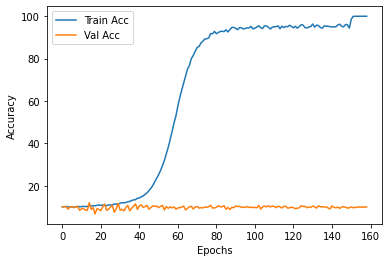

In [ ]:
plt.plot([i for i in range(len(t_acc))], 
         t_acc, label = 'Train Acc')
plt.plot([i for i in range(len(t_acc))], 
         v_acc, label = 'Val Acc')
plt.legend(loc="upper left")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Loss')

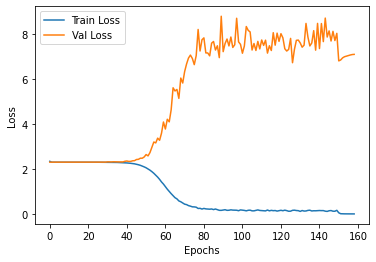

In [ ]:
plt.plot([i for i in range(len(t_loss))], 
         t_loss, label = 'Train Loss')
plt.plot([i for i in range(len(t_loss))], 
         v_loss, label = 'Val Loss')
plt.legend(loc="upper left")

plt.xlabel('Epochs')
plt.ylabel('Loss')